### Import the packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
customers=pd.read_csv(r"C:\sayan\data science interview\course\Python\projects\Python foundation\Python Foundation End to End Case Study E-Commerce Analytics Project\5. Python Foundation End to End Case Study_E-Commerce Analytics Project\CUSTOMERS.csv")
geo_location=pd.read_csv(r"C:\sayan\data science interview\course\Python\projects\Python foundation\Python Foundation End to End Case Study E-Commerce Analytics Project\5. Python Foundation End to End Case Study_E-Commerce Analytics Project\GEO_LOCATION.csv")
order_item=pd.read_csv(r"C:\sayan\data science interview\course\Python\projects\Python foundation\Python Foundation End to End Case Study E-Commerce Analytics Project\5. Python Foundation End to End Case Study_E-Commerce Analytics Project\ORDER_ITEMS.csv")
order_payment=pd.read_csv(r"C:\sayan\data science interview\course\Python\projects\Python foundation\Python Foundation End to End Case Study E-Commerce Analytics Project\5. Python Foundation End to End Case Study_E-Commerce Analytics Project\ORDER_PAYMENTS.csv")
order_review_ratings=pd.read_csv(r"C:\sayan\data science interview\course\Python\projects\Python foundation\Python Foundation End to End Case Study E-Commerce Analytics Project\5. Python Foundation End to End Case Study_E-Commerce Analytics Project\ORDER_REVIEW_RATINGS.csv")
orders=pd.read_csv(r"C:\sayan\data science interview\course\Python\projects\Python foundation\Python Foundation End to End Case Study E-Commerce Analytics Project\5. Python Foundation End to End Case Study_E-Commerce Analytics Project\ORDERS.csv")
products=pd.read_csv(r"C:\sayan\data science interview\course\Python\projects\Python foundation\Python Foundation End to End Case Study E-Commerce Analytics Project\5. Python Foundation End to End Case Study_E-Commerce Analytics Project\PRODUCTS.csv")
sellers=pd.read_csv(r"C:\sayan\data science interview\course\Python\projects\Python foundation\Python Foundation End to End Case Study E-Commerce Analytics Project\5. Python Foundation End to End Case Study_E-Commerce Analytics Project\SELLERS.csv")

In [3]:
customers.sample(5)

customer_id                customer_unique_id  \
59557  f8a91299d86c7e57b2a1299f3947f244  a6b1af736ecc023dbb5d7c5e67154b70   
66350  e7f8439921b9951bf47bf39a2273dbcb  be7816f461c5141d0fd0c0048e9aae51   
12989  33380c31f765f9aa184c40351e9f3b6a  c113c632c226f699c39a1640a5b14fa0   
67604  1546083b9da847c3de0b33350ffb2115  cdee81ddb2fbddbe11774549f3965a0f   
87548  bfddea478823f3128b7a3bd9253988e7  9ddf3b3f87864dc1fa52163adc2656c3   

       customer_zip_code_prefix customer_city     customer_state  
59557                     13848     Jairampur  Arunachal Pradesh  
66350                      9861         Adoni     Andhra Pradesh  
12989                     62580           Pen        Maharashtra  
67604                     29156  Ziauddin Pur              Delhi  
87548                     28906    Kalyandurg     Andhra Pradesh

In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [5]:
geo_location.sample(5)

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
6753                         23825       -22.900744       -43.861172   
3348                          6764       -23.612294       -46.765787   
15053                        74926       -16.756217       -49.208565   
10924                        49042       -10.969608       -37.085910   
11457                        55445        -8.560572       -35.830027   

      geolocation_city geolocation_state  
6753          Suryapet    Andhra Pradesh  
3348         Nizamabad    Andhra Pradesh  
15053          Bhainsa    Andhra Pradesh  
10924          Rajokri             Delhi  
11457     Akkarampalle    Andhra Pradesh

In [6]:
geo_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19015 entries, 0 to 19014
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   geolocation_zip_code_prefix  19015 non-null  int64  
 1   geolocation_lat              19015 non-null  float64
 2   geolocation_lng              19015 non-null  float64
 3   geolocation_city             19015 non-null  object 
 4   geolocation_state            19015 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 742.9+ KB


In [7]:
order_item.sample(5)

order_id  order_item_id  \
43935   63dba135b96cf8bb30f38a43bc02eae9              1   
95902   d9971834a50b8fc323aa7f527978169d              1   
20739   2f7c478f21ac2d388886deb706e200b3              3   
51732   75a639df77fe1f5f3550222a60a47fdb              1   
112258  ff07ff058c25c993a564127557043c5a              1   

                              product_id                         seller_id  \
43935   71a7800a633691de8ecdd17463335e2e  f80edd2c5aaa505cc4b0a3b219abf4b8   
95902   72d3bf1d3a790f8874096fcf860e3eff  0bae85eb84b9fb3bd773911e89288d54   
20739   67cee25aae565b8f1182ea8c37440103  391fc6631aebcf3004804e51b40bcf1e   
51732   2708ea4fc1340081efeffbf11f14d765  f8db351d8c4c4c22c6835c19a46f01b0   
112258  43c78a3f875907bf2e94679f591c4724  d2374cbcbb3ca4ab1086534108cc3ab7   

       shipping_limit_date   price  freight_value  
43935       5/2/2017 23:22   59.90          24.91  
95902       10/3/2017 0:49   38.25          16.11  
20739        3/8/2017 4:10   49.70           9.31  
51732      4/14/2017 10:55  129.90          19.19  
112258     3/28/2018 23:30   51.90          13.72

In [8]:
order_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [9]:
order_payment.sample(5)

order_id  payment_sequential payment_type  \
14336  884199734cfb1a00ae1fd610a03e8a4e                   1  credit_card   
55800  d0a2ee9c1866926b3d773366fd916e37                   1  credit_card   
42320  f28950936ddcde93718b2be1097aed84                   1  credit_card   
2501   fd13060be6469ec5e5986eeb10930d90                   1  credit_card   
4976   0fd408210166f23fe823070a2f690048                   1  credit_card   

       payment_installments  payment_value  
14336                     2          85.08  
55800                     1          20.38  
42320                     1          42.78  
2501                      1          95.99  
4976                      1         135.66

In [10]:
order_payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [11]:
order_review_ratings.sample(5)

review_id                          order_id  \
57600  f9f6cc2ff1a1d72d80754d7ee4e9199c  f138b65dbccee43e2a1720d752d78897   
68613  94e23ecf2b4529548b3897a2800084b8  d73917ec36e8910a0bcaae1bd54ee0d4   
67181  777349225b84971c3761d21f97a3c0d8  6e8a97f227260b48b2c8e8eacc87d2fb   
81615  649fd6e20481bd5285f2f37d8b24ea16  3fcc23281e8679bfb293a37d2fd3eeb8   
56393  875d4ac395bbe012ffeb7259b08aaa00  1aa297bbbaf5713012d3a1431645b2b4   

       review_score review_creation_date review_answer_timestamp  
57600             4        4/8/2018 0:00           4/9/2018 2:23  
68613             3        5/1/2018 0:00           5/4/2018 0:27  
67181             1      11/28/2017 0:00         11/29/2017 9:42  
81615             4       3/24/2018 0:00         3/26/2018 19:28  
56393             5       5/24/2018 0:00          5/31/2018 0:43

In [12]:
order_review_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_creation_date     100000 non-null  object
 4   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [13]:
orders.sample(5)

order_id                       customer_id  \
68546  6222941cfa1ed5d04567dfff61e3e25f  5e82ab5c814f9e94d5f6986c0d3e2e93   
60880  ccf2c1980921a53b885e2b75c8016ea0  e38405bcd1c6689c8d6633465f927362   
51111  dcdd1d6c661bf3e70d6e9d12cbe0e35a  127f6831a8583820bfee59da2334b6b4   
90137  3a8b1e565c498e2688ae1e60745544d8  629bbdb95c29abfed36d1dd1b8715685   
45270  e8fdf80510b65c9abdaf0ae2446bd55a  e2b5aaefe3f4020eb916560800ea9823   

      order_status order_purchase_timestamp order_approved_at  \
68546    delivered           2/16/2018 9:01    2/16/2018 9:35   
60880    delivered          8/10/2018 17:04   8/10/2018 17:24   
51111    delivered           5/11/2018 6:14    5/11/2018 6:30   
90137    delivered           2/9/2018 15:10    2/9/2018 15:29   
45270    delivered          3/24/2018 15:44   3/24/2018 15:55   

      order_delivered_carrier_date order_delivered_customer_date  \
68546              2/21/2018 21:14               2/28/2018 21:42   
60880              8/13/2018 15:41               8/14/2018 18:07   
51111              5/11/2018 15:09               5/14/2018 19:24   
90137              2/16/2018 21:25               2/22/2018 17:39   
45270              3/27/2018 13:04                4/5/2018 19:24   

      order_estimated_delivery_date  
68546                3/19/2018 0:00  
60880                8/15/2018 0:00  
51111                5/25/2018 0:00  
90137                 3/6/2018 0:00  
45270                4/18/2018 0:00

In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [15]:
products.sample(5)

product_id product_category_name  \
5477   3c28d10ea65fbafd9792027334cf4544       Furniture_Decor   
8009   663672ba9d02ab854b20231eb7e0b827       Furniture_Decor   
19482  28ce57ecf4afba85e6020ec0209cada9            Cool_Stuff   
20783  a53d9459ab35c28053d6b7732fb8ca07             Telephony   
18679  5071625b1813fd174bb748137b5bc134        Sports_Leisure   

       product_name_lenght  product_description_lenght  product_photos_qty  \
5477                  57.0                      1586.0                 6.0   
8009                  58.0                       570.0                 1.0   
19482                 31.0                       248.0                 2.0   
20783                 53.0                       880.0                 2.0   
18679                 42.0                       269.0                 3.0   

       product_weight_g  product_length_cm  product_height_cm  \
5477              228.0               17.0               12.0   
8009              300.0               35.0               10.0   
19482            5650.0               73.0               73.0   
20783              50.0               18.0                6.0   
18679             500.0               34.0               12.0   

       product_width_cm  
5477               15.0  
8009               25.0  
19482              20.0  
20783              11.0  
18679              19.0

In [16]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32328 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [17]:
sellers.sample(5)

seller_id  seller_zip_code_prefix   seller_city  \
2137  36890be00bbfc1cdb9a4a38a6af05a69                    6040        Nagari   
912   b8114f2f589a6804810f04f99b36b498                    9633         Adoni   
1094  31be790e64fc99f8ff48ec2bd18a3104                    9690         Adoni   
39    b2a6d334e2833acea353624840e25a0e                    4133  Akkarampalle   
2313  42ef3192a9ff87a22d1867b74b3ee205                    9090   Bheemavaram   

        seller_state  
2137  Andhra Pradesh  
912   Andhra Pradesh  
1094  Andhra Pradesh  
39    Andhra Pradesh  
2313  Andhra Pradesh

In [18]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3038 non-null   object
 3   seller_state            3038 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


# 1. Perform Detailed exploratory analysis
a. Define & calculate high level metrics like (Total Revenue, Total quantity, Total 
products, Total categories, Total sellers, Total locations, Total 
payment methods)

In [19]:
print('TOTAL REVENUE:', order_payment.payment_value.sum())
print('TOTAL QUANTITY:', order_item.shape[0])
print('TOTAL PRODUCTS:', products.product_id.nunique())
print('TOTAL PRODUCTS CATEGORIES:', products.product_category_name.nunique())
print('TOTAL SELLERS:', sellers.seller_id.nunique())
print('TOTAL LOCATIONS:', geo_location.geolocation_zip_code_prefix.nunique())
print('TOTAL PAYMENT METHODS:', order_payment.payment_type.nunique())
print('TOTAL SELLER LOCATION:', sellers.seller_city.nunique())

TOTAL REVENUE: 16008872.12
TOTAL QUANTITY: 112650
TOTAL PRODUCTS: 32951
TOTAL PRODUCTS CATEGORIES: 71
TOTAL SELLERS: 3095
TOTAL LOCATIONS: 19015
TOTAL PAYMENT METHODS: 5
TOTAL SELLER LOCATION: 534


## 1. Perform Detailed exploratory analysis
b. Understanding how many new customers acquired every month

c. Understand the retention of customers on month on month basis

In [20]:
#Converting given dates into proper DateTime format
orders.order_purchase_timestamp=pd.to_datetime(orders.order_purchase_timestamp)

In [21]:
#Calculating month,year,week number
orders['month']=orders.order_purchase_timestamp.apply(lambda x: x.month)
orders['year']=orders.order_purchase_timestamp.apply(lambda x: x.year)
orders['week_num']=orders.order_purchase_timestamp.apply(lambda x: x.week)

In [22]:
#sorting the data datewise
orders.sort_values(by='order_purchase_timestamp',inplace=True,ignore_index=True)

In [23]:
orders.head()

order_id                       customer_id  \
0  2e7a8482f6fb09756ca50c10d7bfc047  08c5351a6aca1c1589a38f244edeee9d   
1  e5fa5a7210941f7d56d0208e4e071d35  683c54fc24d40ee9f8a6fc179fd9856c   
2  809a282bbd5dbcabb6f2f724fca862ec  622e13439d6b5a0b486c435618b2679e   
3  bfbd0f9bdef84302105ad712db648a6c  86dc2ffce2dfff336de2f386a786e574   
4  71303d7e93b399f5bcd537d124c0bcfa  b106b360fe2ef8849fbbd056f777b4d5   

  order_status order_purchase_timestamp order_approved_at  \
0      shipped      2016-09-04 21:15:00   10/7/2016 13:18   
1     canceled      2016-09-05 00:15:00   10/7/2016 13:17   
2     canceled      2016-09-13 15:24:00   10/7/2016 13:16   
3    delivered      2016-09-15 12:16:00   9/15/2016 12:16   
4     canceled      2016-10-02 22:07:00   10/6/2016 15:50   

  order_delivered_carrier_date order_delivered_customer_date  \
0             10/18/2016 13:14                           NaN   
1                          NaN                           NaN   
2                          NaN                           NaN   
3              11/7/2016 17:11                11/9/2016 7:47   
4                          NaN                           NaN   

  order_estimated_delivery_date  month  year  week_num  
0               10/20/2016 0:00      9  2016        35  
1               10/28/2016 0:00      9  2016        36  
2                9/30/2016 0:00      9  2016        37  
3                10/4/2016 0:00      9  2016        37  
4               10/25/2016 0:00     10  2016        39

#### Merging Data

In [24]:
#Merge1=order+customer
order_cust=pd.merge(left=orders,right=customers,left_on='customer_id',right_on='customer_id')

In [25]:
#Finding New/Old Customers
np.where(order_cust.duplicated(subset='customer_unique_id')==False,'New_Cust','Existing_Cust')

array(['New_Cust', 'New_Cust', 'New_Cust', ..., 'Existing_Cust',
       'Existing_Cust', 'New_Cust'], dtype='<U13')

In [26]:
order_cust['Customer_Type']=np.where(order_cust.duplicated(subset='customer_unique_id')==False,'New_Cust','Existing_Cust')

In [27]:
order_cust.sample(5)

order_id                       customer_id  \
61717  6fdd6ca7bdcce986b6a442588af840a3  f13f5be3fb0e2df0eac326aa188c7a68   
31320  0911bde30c594a8d02279916da2ece61  9610f21b66c3938400ad9f39014bf93b   
39209  e865720063d35fe789029a6021f2df31  eb70fff1e6f5d8c627864ac88b9859c6   
66111  f05c1aa49a54cd865ee8ac61c2b15473  0ee9116e24841febd9a2debcd75cdfa0   
80175  935f9339b5dd814b7ff8cfbedf010732  6f2da93c70443d0dc6c0a0f7d24b2aa3   

      order_status order_purchase_timestamp order_approved_at  \
61717    delivered      2018-03-10 11:59:00   3/10/2018 12:10   
31320    delivered      2017-10-25 14:38:00  10/25/2017 15:33   
39209    delivered      2017-11-29 09:37:00   11/30/2017 2:24   
66111    delivered      2018-03-29 00:21:00    3/29/2018 0:35   
80175    delivered      2018-05-29 23:23:00    5/31/2018 3:36   

      order_delivered_carrier_date order_delivered_customer_date  \
61717              3/14/2018 23:31                4/6/2018 21:08   
31320             10/26/2017 20:09               11/1/2017 20:25   
39209               12/5/2017 2:49              12/19/2017 22:43   
66111              3/29/2018 22:28                4/9/2018 15:26   
80175               6/1/2018 14:40                6/3/2018 17:03   

      order_estimated_delivery_date  month  year  week_num  \
61717                4/10/2018 0:00      3  2018        10   
31320               11/17/2017 0:00     10  2017        43   
39209               12/28/2017 0:00     11  2017        48   
66111                4/20/2018 0:00      3  2018        13   
80175                6/21/2018 0:00      5  2018        22   

                     customer_unique_id  customer_zip_code_prefix  \
61717  532155a7e1214ecd05d6c445e3354bc2                     98280   
31320  e0742ca20dc0749f4e70f5506432bced                     28860   
39209  5a6637b7f03edf22def5e269822d4326                     80730   
66111  3a614e2c3bbeb8769ff7b4aaba6cfee0                      4010   
80175  9fa699e90425ad6b288d83f2d832bc05                      8122   

      customer_city  customer_state Customer_Type  
61717      Mahilpur          Punjab      New_Cust  
31320      Mithapur         Gujarat      New_Cust  
39209    Anakapalle  Andhra Pradesh      New_Cust  
66111  Akkarampalle  Andhra Pradesh      New_Cust  
80175  Akkarampalle  Andhra Pradesh      New_Cust

In [28]:
order_cust.pivot_table(index=['year','month'],columns='Customer_Type',values='customer_id',aggfunc='count')

Customer_Type  Existing_Cust  New_Cust
year month                            
2016 9                   NaN       4.0
     10                  3.0     321.0
     12                  NaN       1.0
2017 1                  36.0     764.0
     2                  28.0    1752.0
     3                  46.0    2636.0
     4                  52.0    2352.0
     5                 104.0    3596.0
     6                 106.0    3139.0
     7                 132.0    3894.0
     8                 147.0    4184.0
     9                 155.0    4130.0
     10                161.0    4470.0
     11                240.0    7304.0
     12                186.0    5487.0
2018 1                 244.0    7025.0
     2                 277.0    6451.0
     3                 246.0    6965.0
     4                 228.0    6711.0
     5                 251.0    6622.0
     6                 227.0    5940.0
     7                 221.0    6071.0
     8                 241.0    6271.0
     9                  11.0       5.0
     10                  3.0       1.0

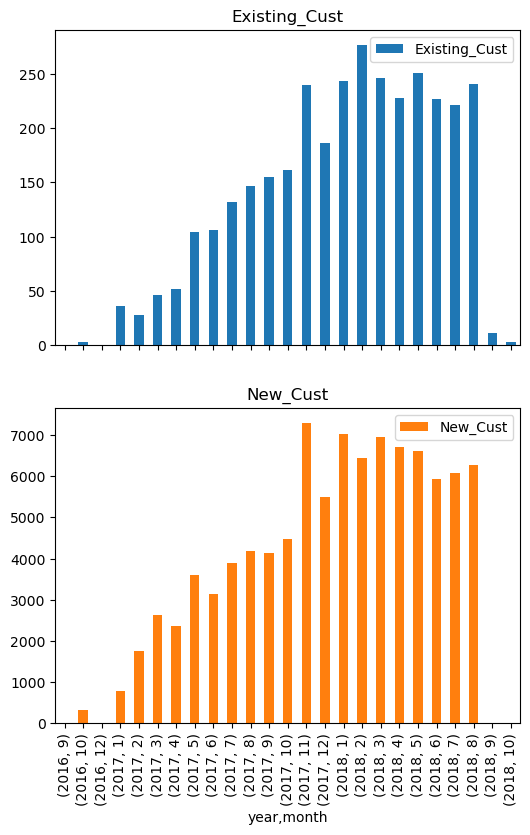

In [29]:
order_cust.pivot_table(index=['year','month'],columns='Customer_Type',values='customer_id',
                       aggfunc='count').plot(kind='bar',subplots=True,figsize=(6,9))
plt.show()

## 1. Perform Detailed exploratory analysis
d. How the revenues from existing/new customers on month on month basis

In [30]:
#Merge2=order+customer+order_payment
order_cust_pay=pd.merge(left=order_cust,right=order_payment,left_on='order_id',right_on='order_id')

In [31]:
order_cust_pay.pivot_table(index=['year','month'],columns='Customer_Type',values='payment_value',
                              aggfunc=('sum','mean'))

mean                       sum            
Customer_Type Existing_Cust    New_Cust Existing_Cust    New_Cust
year month                                                       
2016 9                  NaN   84.080000           NaN      252.24
     10          100.313333  173.420472        300.94    58789.54
     12                 NaN   19.620000           NaN       19.62
2017 1            86.593721  166.994436       3723.53   134764.51
     2           114.944667  155.420081       3448.34   288459.67
     3            95.025088  159.873083       5416.43   444447.17
     4           191.535556  161.877279      10342.92   407445.11
     5           148.225727  150.394885      16304.83   576613.99
     6           104.514500  150.402485      12541.74   498734.64
     7           138.618836  137.172038      20238.35   572144.57
     8           131.002267  148.895370      22532.39   651863.93
     9           146.039048  161.735945      24534.56   703227.89
     10          128.296199  161.599324      21938.65   757739.23
     11          129.947470  152.682674      32356.92  1162525.88
     12          162.356753  148.553634      31497.21   846904.27
2018 1           142.678030  147.600655      37667.00  1077337.18
     2           129.301131  143.330502      36592.22   955871.12
     3           136.138008  155.016647      34851.33  1124800.79
     4           146.894667  161.505347      35254.72  1125530.76
     5           154.301094  162.012076      39501.08  1114481.07
     6           142.837366  160.163701      34709.48   989171.02
     7           145.690351  164.568140      33217.40  1033323.35
     8           173.813052  151.829101      43279.45   979145.87
     9           123.926364  615.270000       1363.19     3076.35
     10          166.653333   89.710000        499.96       89.71

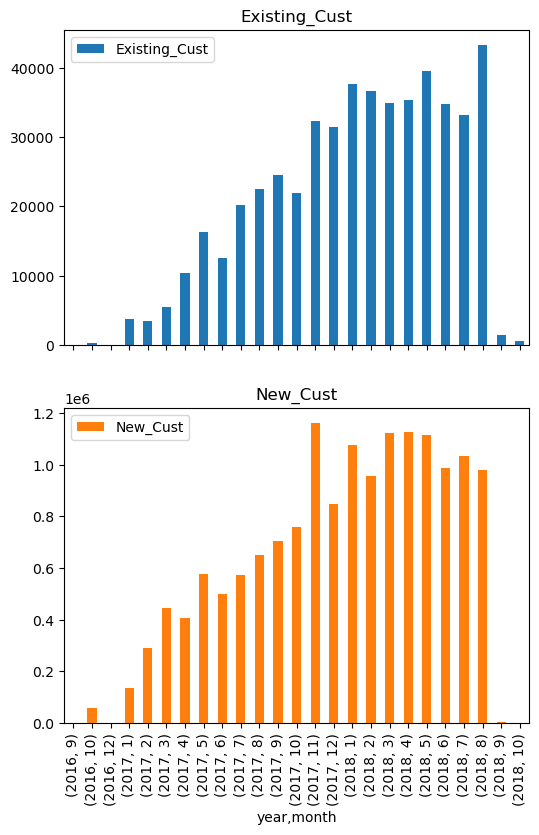

In [32]:
order_cust_pay.pivot_table(index=['year','month'],columns='Customer_Type',values='payment_value',
                              aggfunc='sum').plot(kind='bar',subplots=True,figsize=(6,9))
plt.show()

## 1. Perform Detailed exploratory analysis
e. Understand the trends/seasonality of sales, quantity by category, location, month, 
week, day, time, channel, payment method etc…

In [33]:
#Merge3=order+customer+order_payment+order_item
order_cust_pay_orditm=pd.merge(left=order_cust_pay,right=order_item,left_on='order_id',right_on='order_id')

In [34]:
#Merge4=order+customer+order_payment+order_item+products
order_cust_pay_orditm_prd=pd.merge(left=order_cust_pay_orditm,right=products,left_on='product_id',right_on='product_id')

In [35]:
#Qty vs Category over year and month
order_cust_pay_orditm_prd.pivot_table(index= ['year','month'],columns='product_category_name',
                              values='customer_unique_id',aggfunc='count')

product_category_name  Agro_Industry_And_Commerce  Air_Conditioning   Art  \
year month                                                                  
2016 9                                        NaN               NaN   NaN   
     10                                       NaN              10.0   NaN   
     12                                       NaN               NaN   NaN   
2017 1                                        3.0               4.0   NaN   
     2                                        9.0              13.0   NaN   
     3                                        2.0              18.0   7.0   
     4                                        NaN              16.0   1.0   
     5                                        4.0               8.0   8.0   
     6                                        1.0              11.0  12.0   
     7                                        1.0               5.0   3.0   
     8                                        4.0              16.0   4.0   
     9                                        4.0               8.0   3.0   
     10                                       5.0              14.0   3.0   
     11                                      19.0              19.0   2.0   
     12                                      11.0               3.0   4.0   
2018 1                                       18.0              29.0  19.0   
     2                                       49.0              12.0  14.0   
     3                                       43.0              25.0   7.0   
     4                                       12.0              23.0  26.0   
     5                                        8.0              15.0  37.0   
     6                                       10.0              15.0  28.0   
     7                                       31.0              17.0  22.0   
     8                                       18.0              21.0  19.0   
     9                                        NaN               NaN   NaN   

product_category_name  Arts_And_Craftmanship  Audio   Auto   Baby  \
year month                                                          
2016 9                                   NaN    NaN    NaN    NaN   
     10                                  NaN    2.0   12.0   14.0   
     12                                  NaN    NaN    NaN    NaN   
2017 1                                   NaN    NaN   34.0   41.0   
     2                                   NaN    7.0   88.0   34.0   
     3                                   NaN   14.0   88.0   48.0   
     4                                   NaN   12.0   97.0   52.0   
     5                                   1.0   17.0  132.0  114.0   
     6                                   NaN   11.0  118.0   79.0   
     7                                   1.0    7.0  121.0  139.0   
     8                                   NaN    8.0  177.0  133.0   
     9                                   NaN   11.0  111.0  181.0   
     10                                  NaN   33.0  156.0  140.0   
     11                                  NaN   38.0  269.0  211.0   
     12                                  NaN   18.0  280.0  150.0   
2018 1                                   NaN   27.0  272.0  233.0   
     2                                   NaN   15.0  329.0  177.0   
     3                                   NaN   34.0  353.0  235.0   
     4                                   1.0   32.0  367.0  251.0   
     5                                   1.0   21.0  324.0  260.0   
     6                                   NaN   21.0  313.0  239.0   
     7                                  11.0   22.0  354.0  240.0   
     8                                   9.0   30.0  384.0  225.0   
     9                                   NaN    NaN    NaN    NaN   

product_category_name  Bed_Bath_Table  Books_General_Interest  Books_Imported  \
year month                                                                      
2016 9                            NaN   

<Figure size 640x480 with 0 Axes>

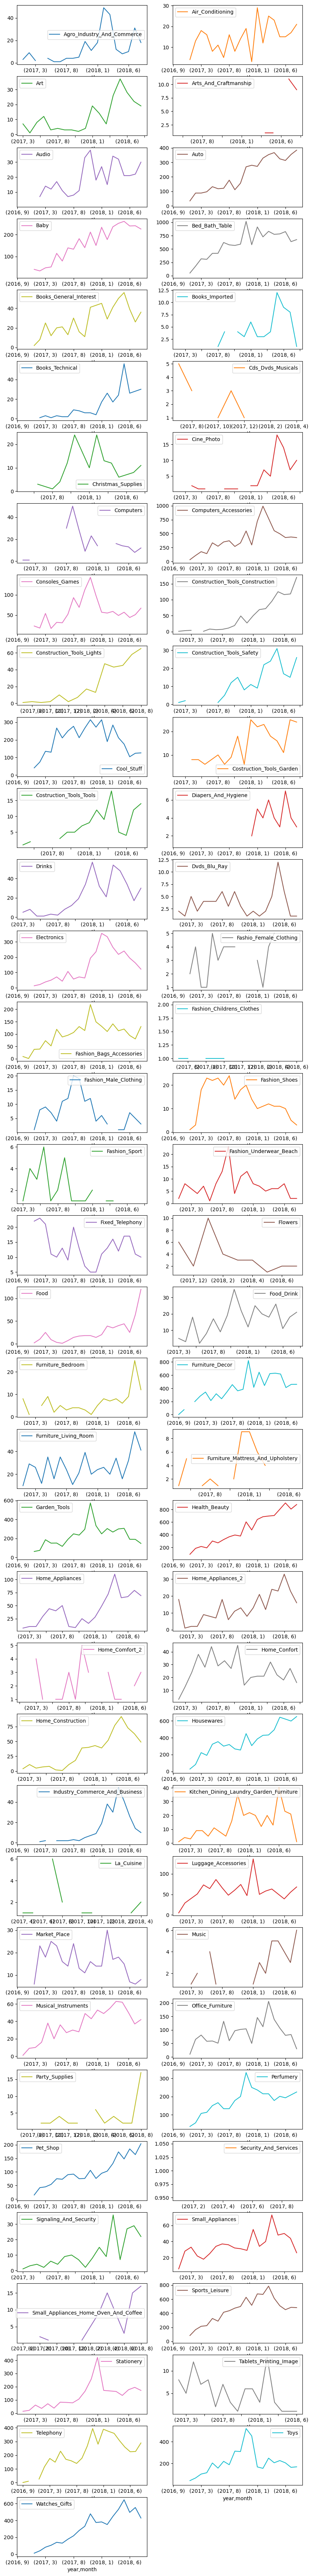

In [36]:
plt.figure(layout ='tight')
order_cust_pay_orditm_prd.pivot_table(index= ['year','month'],columns='product_category_name',
                              values='customer_unique_id',aggfunc='count').plot(kind='line',
                           subplots=True,sharex=False,sharey=False,figsize=(10,90),layout=(36,2))
plt.show()

<Figure size 640x480 with 0 Axes>

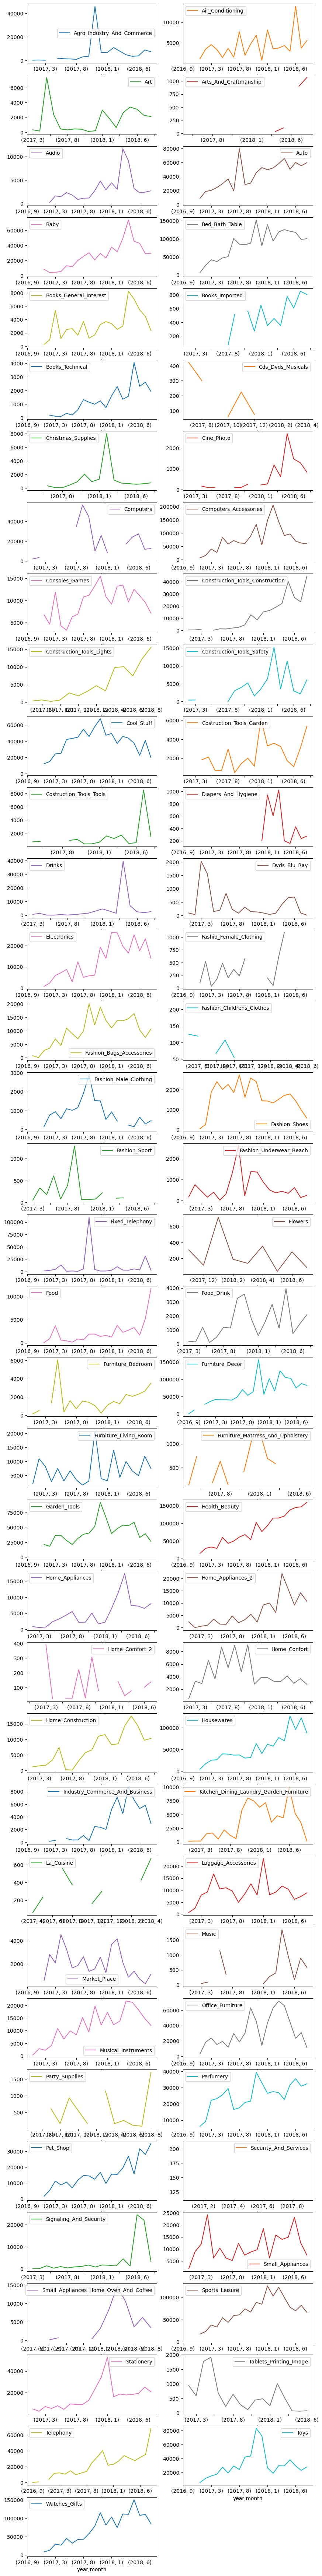

In [37]:
#Sales vs Category over year and month
plt.figure(layout ='tight')
order_cust_pay_orditm_prd.pivot_table(index= ['year','month'],columns='product_category_name',
                              values='payment_value',aggfunc='sum').plot(kind='line',
                           subplots=True,sharex=False,sharey=False,figsize=(10,90),layout=(36,2))
plt.show()

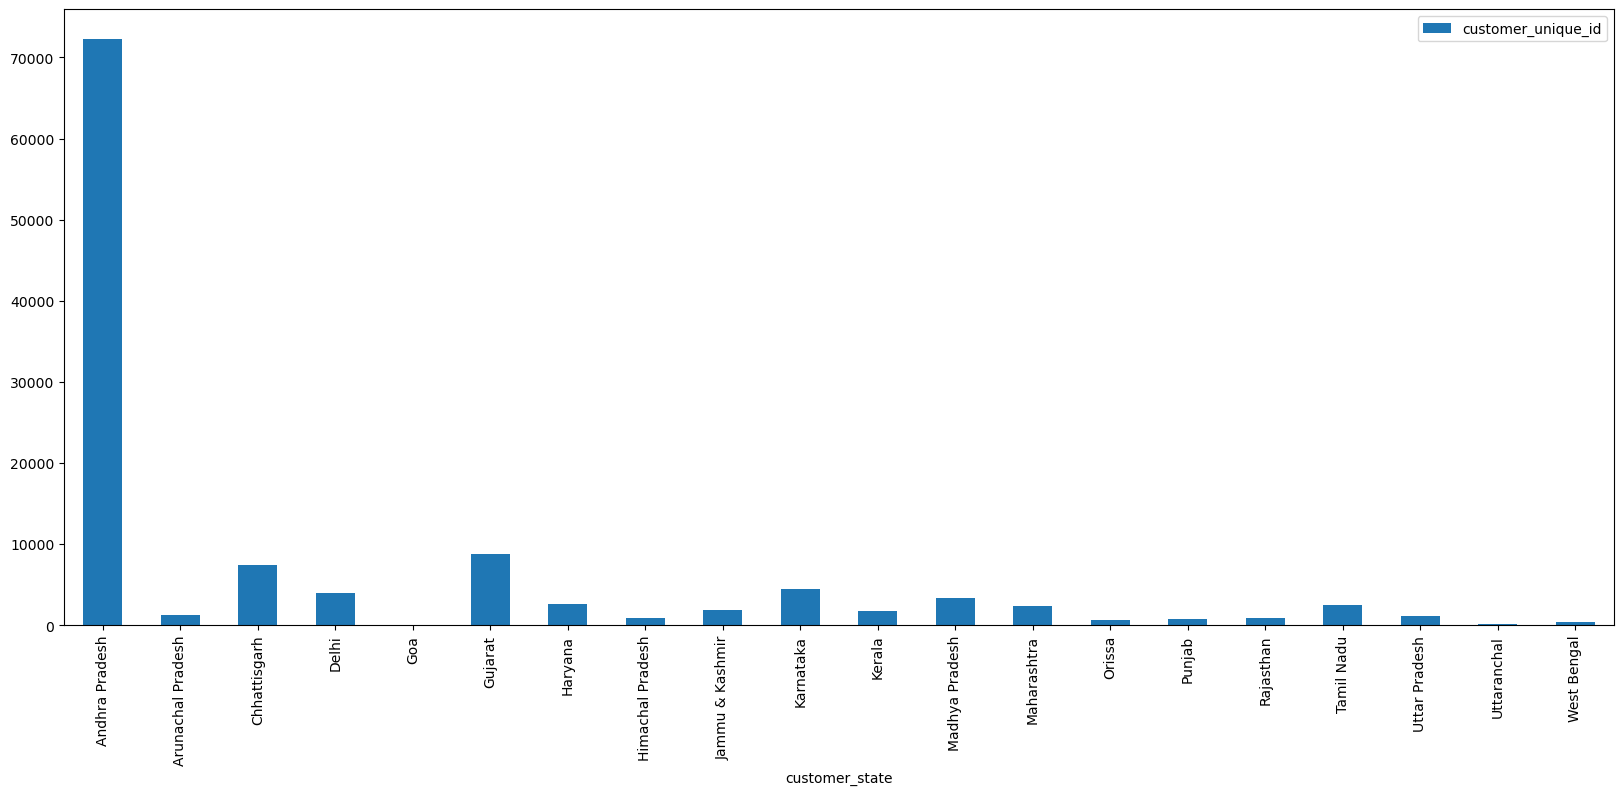

In [38]:
#Qty vs Location
order_cust_pay_orditm_prd.pivot_table(index='customer_state',values='customer_unique_id',
                              aggfunc='count').plot(kind='bar',figsize=(20,8))
plt.show()

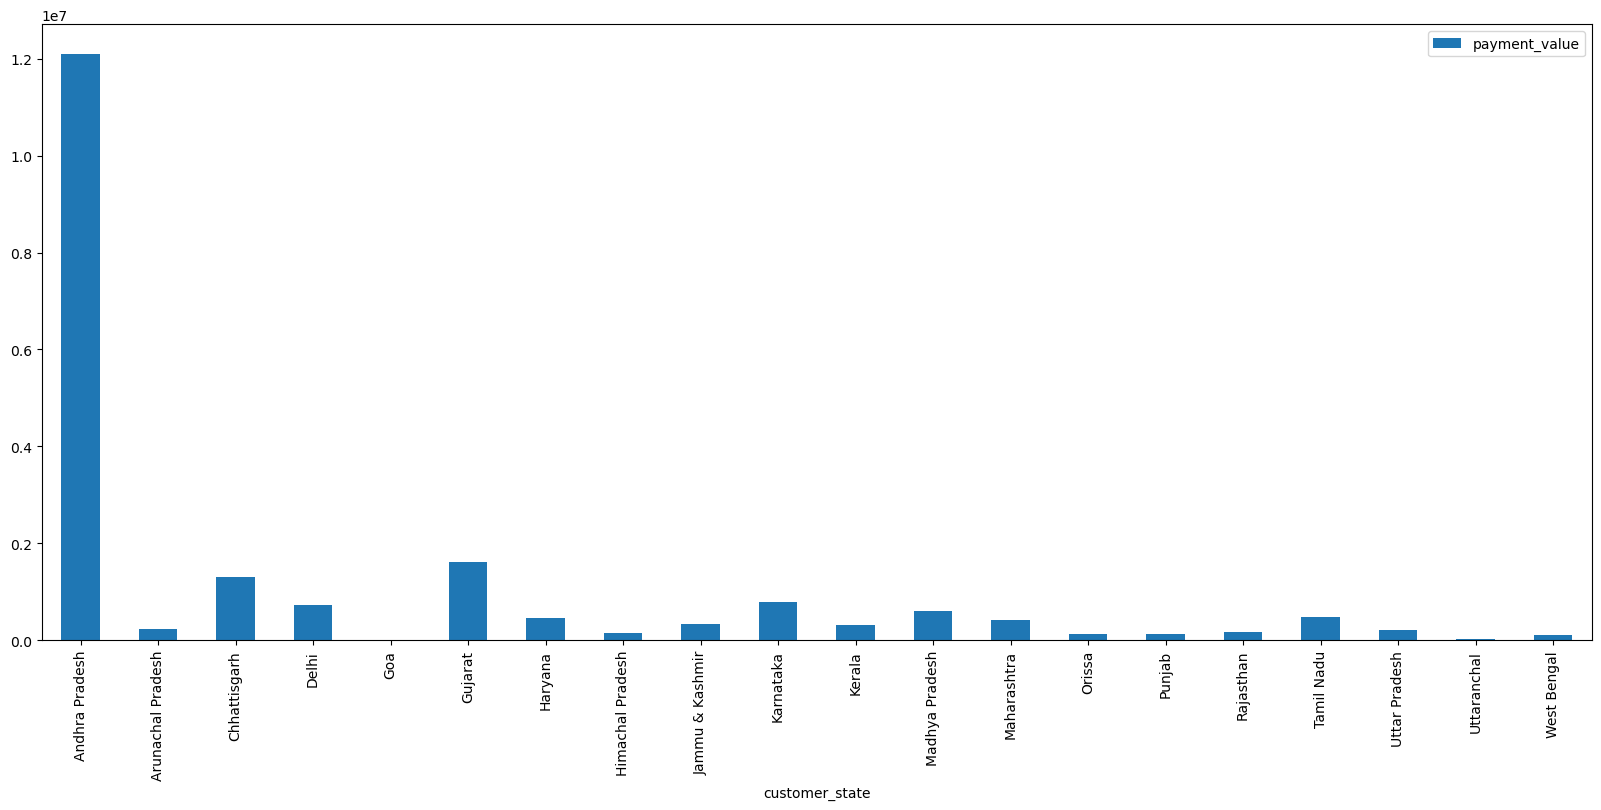

In [39]:
#Sales vs Location
order_cust_pay_orditm_prd.pivot_table(index='customer_state',
                                      values='payment_value',aggfunc='sum').plot(kind='bar',figsize=(20,8))
plt.show()

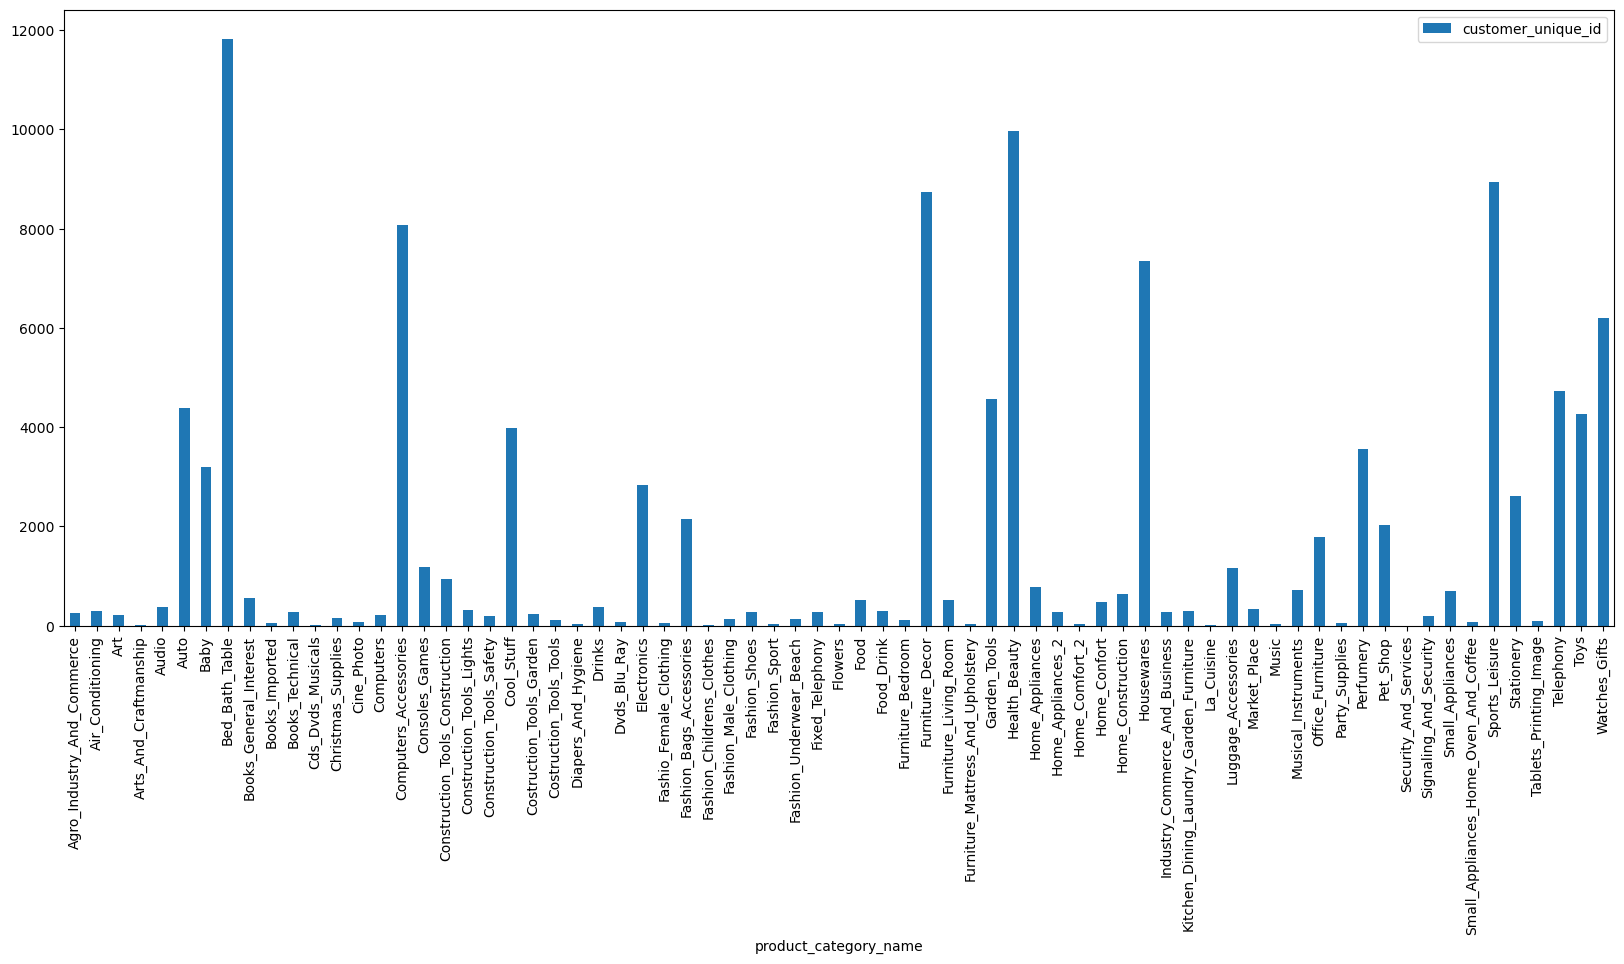

In [40]:
#Qty vs Location
order_cust_pay_orditm_prd.pivot_table(index='product_category_name',values='customer_unique_id',
                              aggfunc='count').plot(kind='bar',figsize=(20,8))
plt.show()

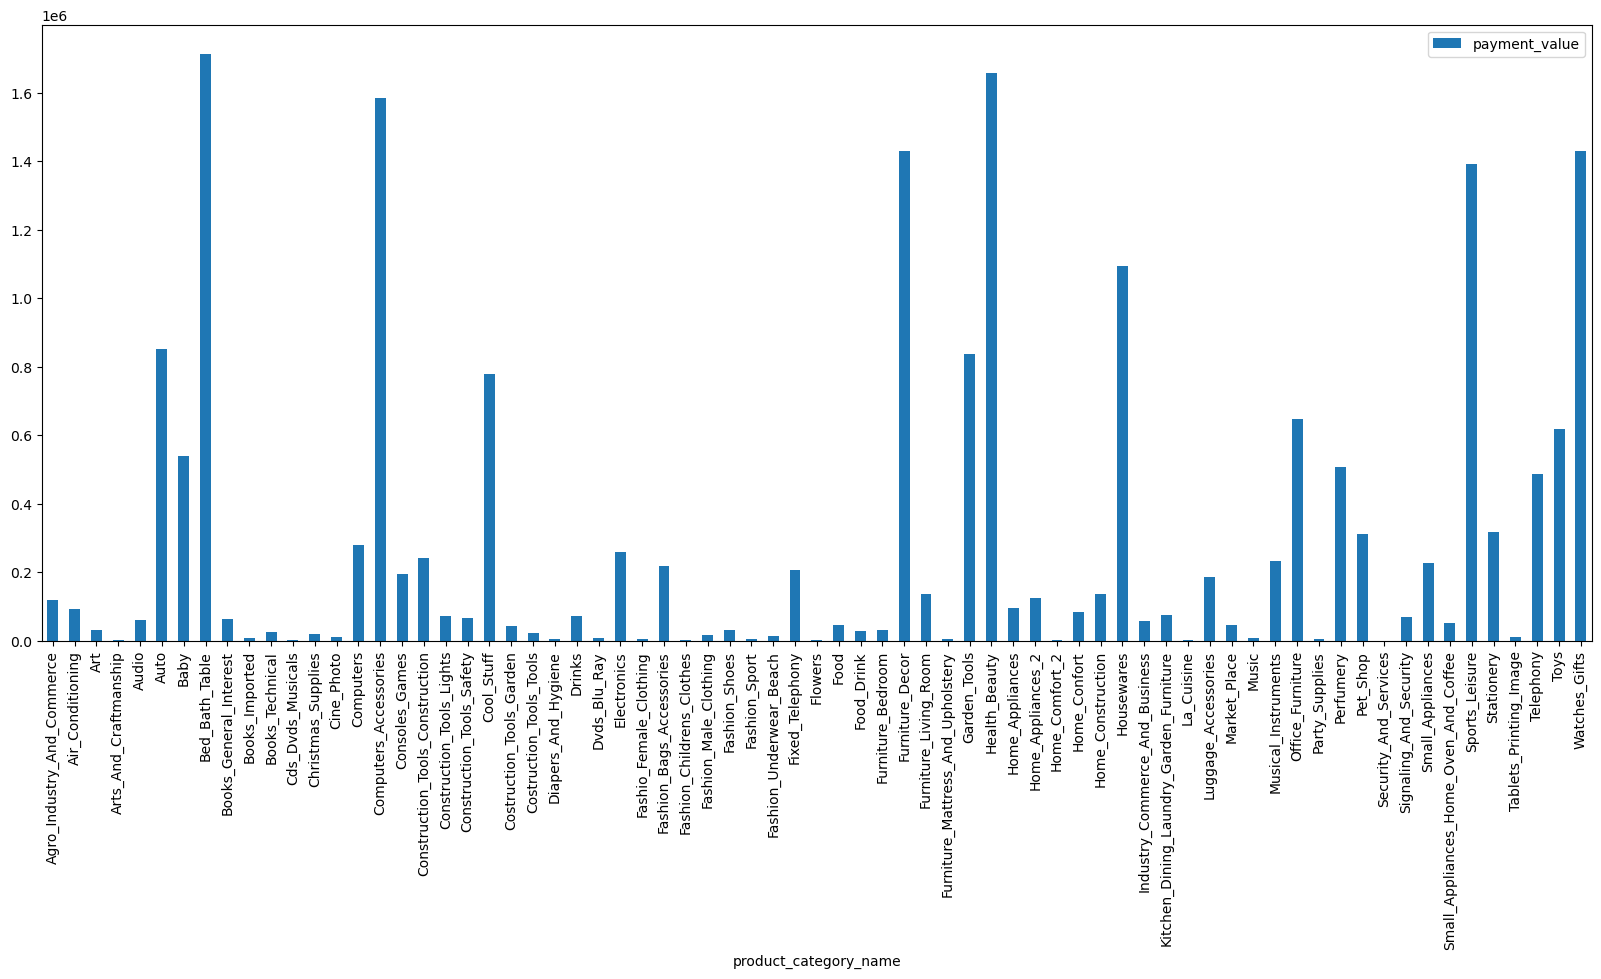

In [41]:
#Sales vs Category
order_cust_pay_orditm_prd.pivot_table(index='product_category_name',values='payment_value',
                              aggfunc='sum').plot(kind='bar',figsize=(20,8))
plt.show()

<Axes: xlabel='payment_type'>

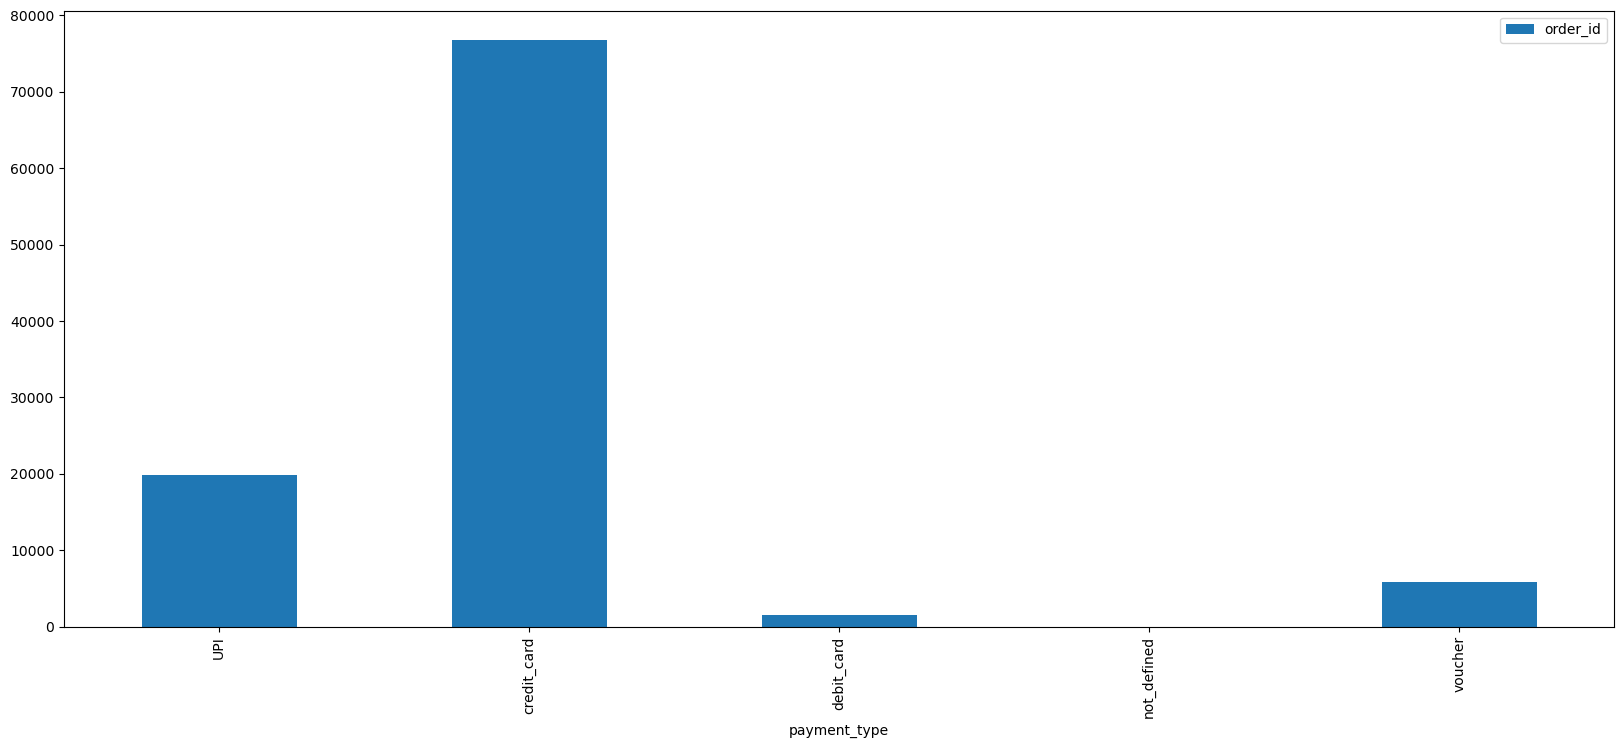

In [42]:
#No. of Sales via different payment methods
order_payment.pivot_table(index='payment_type',values='order_id',
                              aggfunc='count').plot(kind='bar',figsize=(20,8))

<Axes: xlabel='payment_type'>

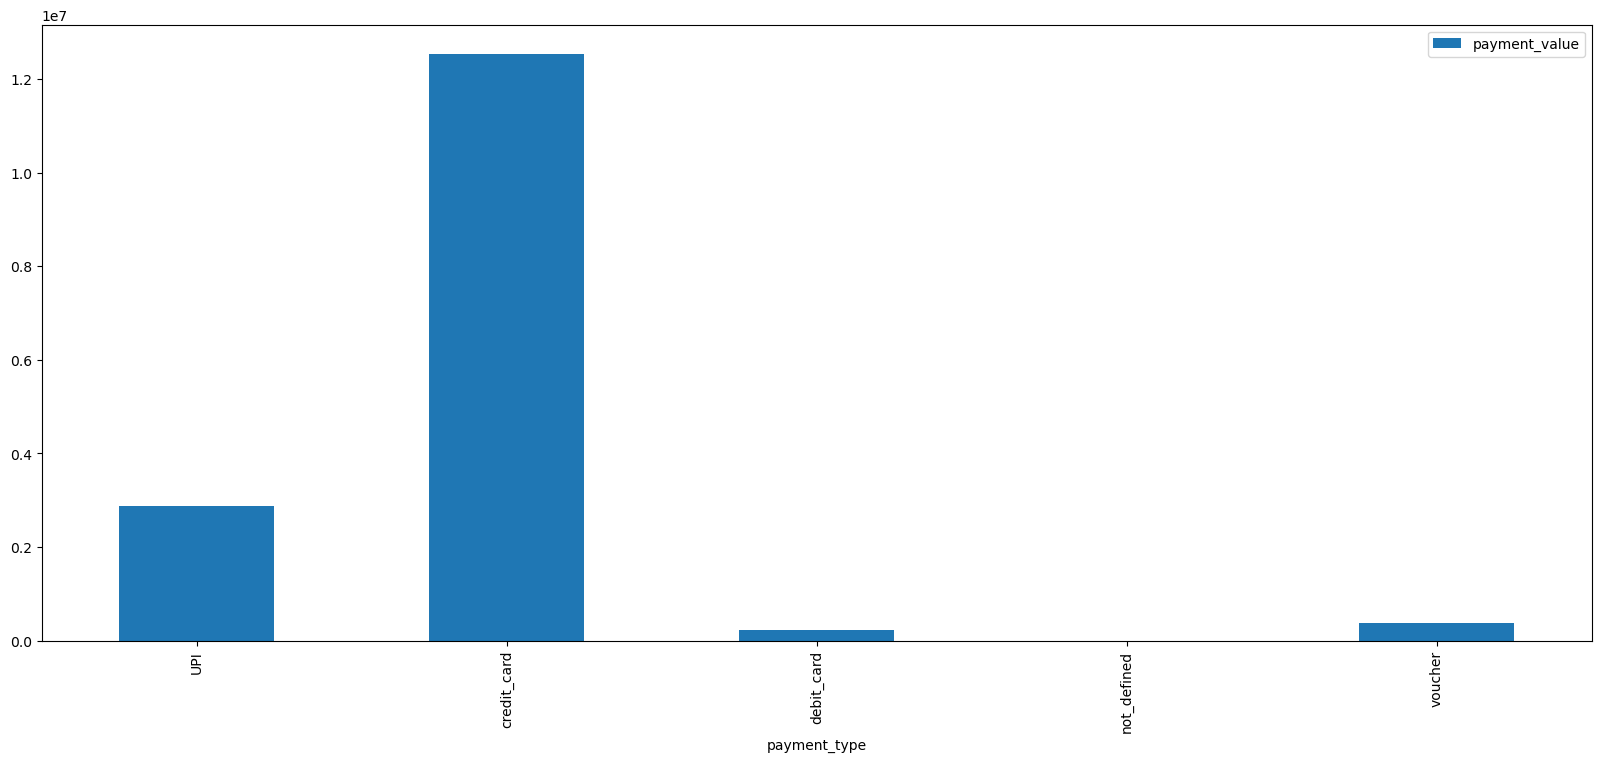

In [43]:
#Amount of Sales via different payment methods
order_payment.pivot_table(index='payment_type',values='payment_value',
                              aggfunc='sum').plot(kind='bar',figsize=(20,8))

## 1. Perform Detailed exploratory analysis
f. Popular Products categories by month, seller, state, category.

In [44]:
#Popular Products categories by month
popular=order_cust_pay_orditm_prd.pivot_table(index='product_category_name',columns='month',
                                              values='customer_unique_id',aggfunc="count")

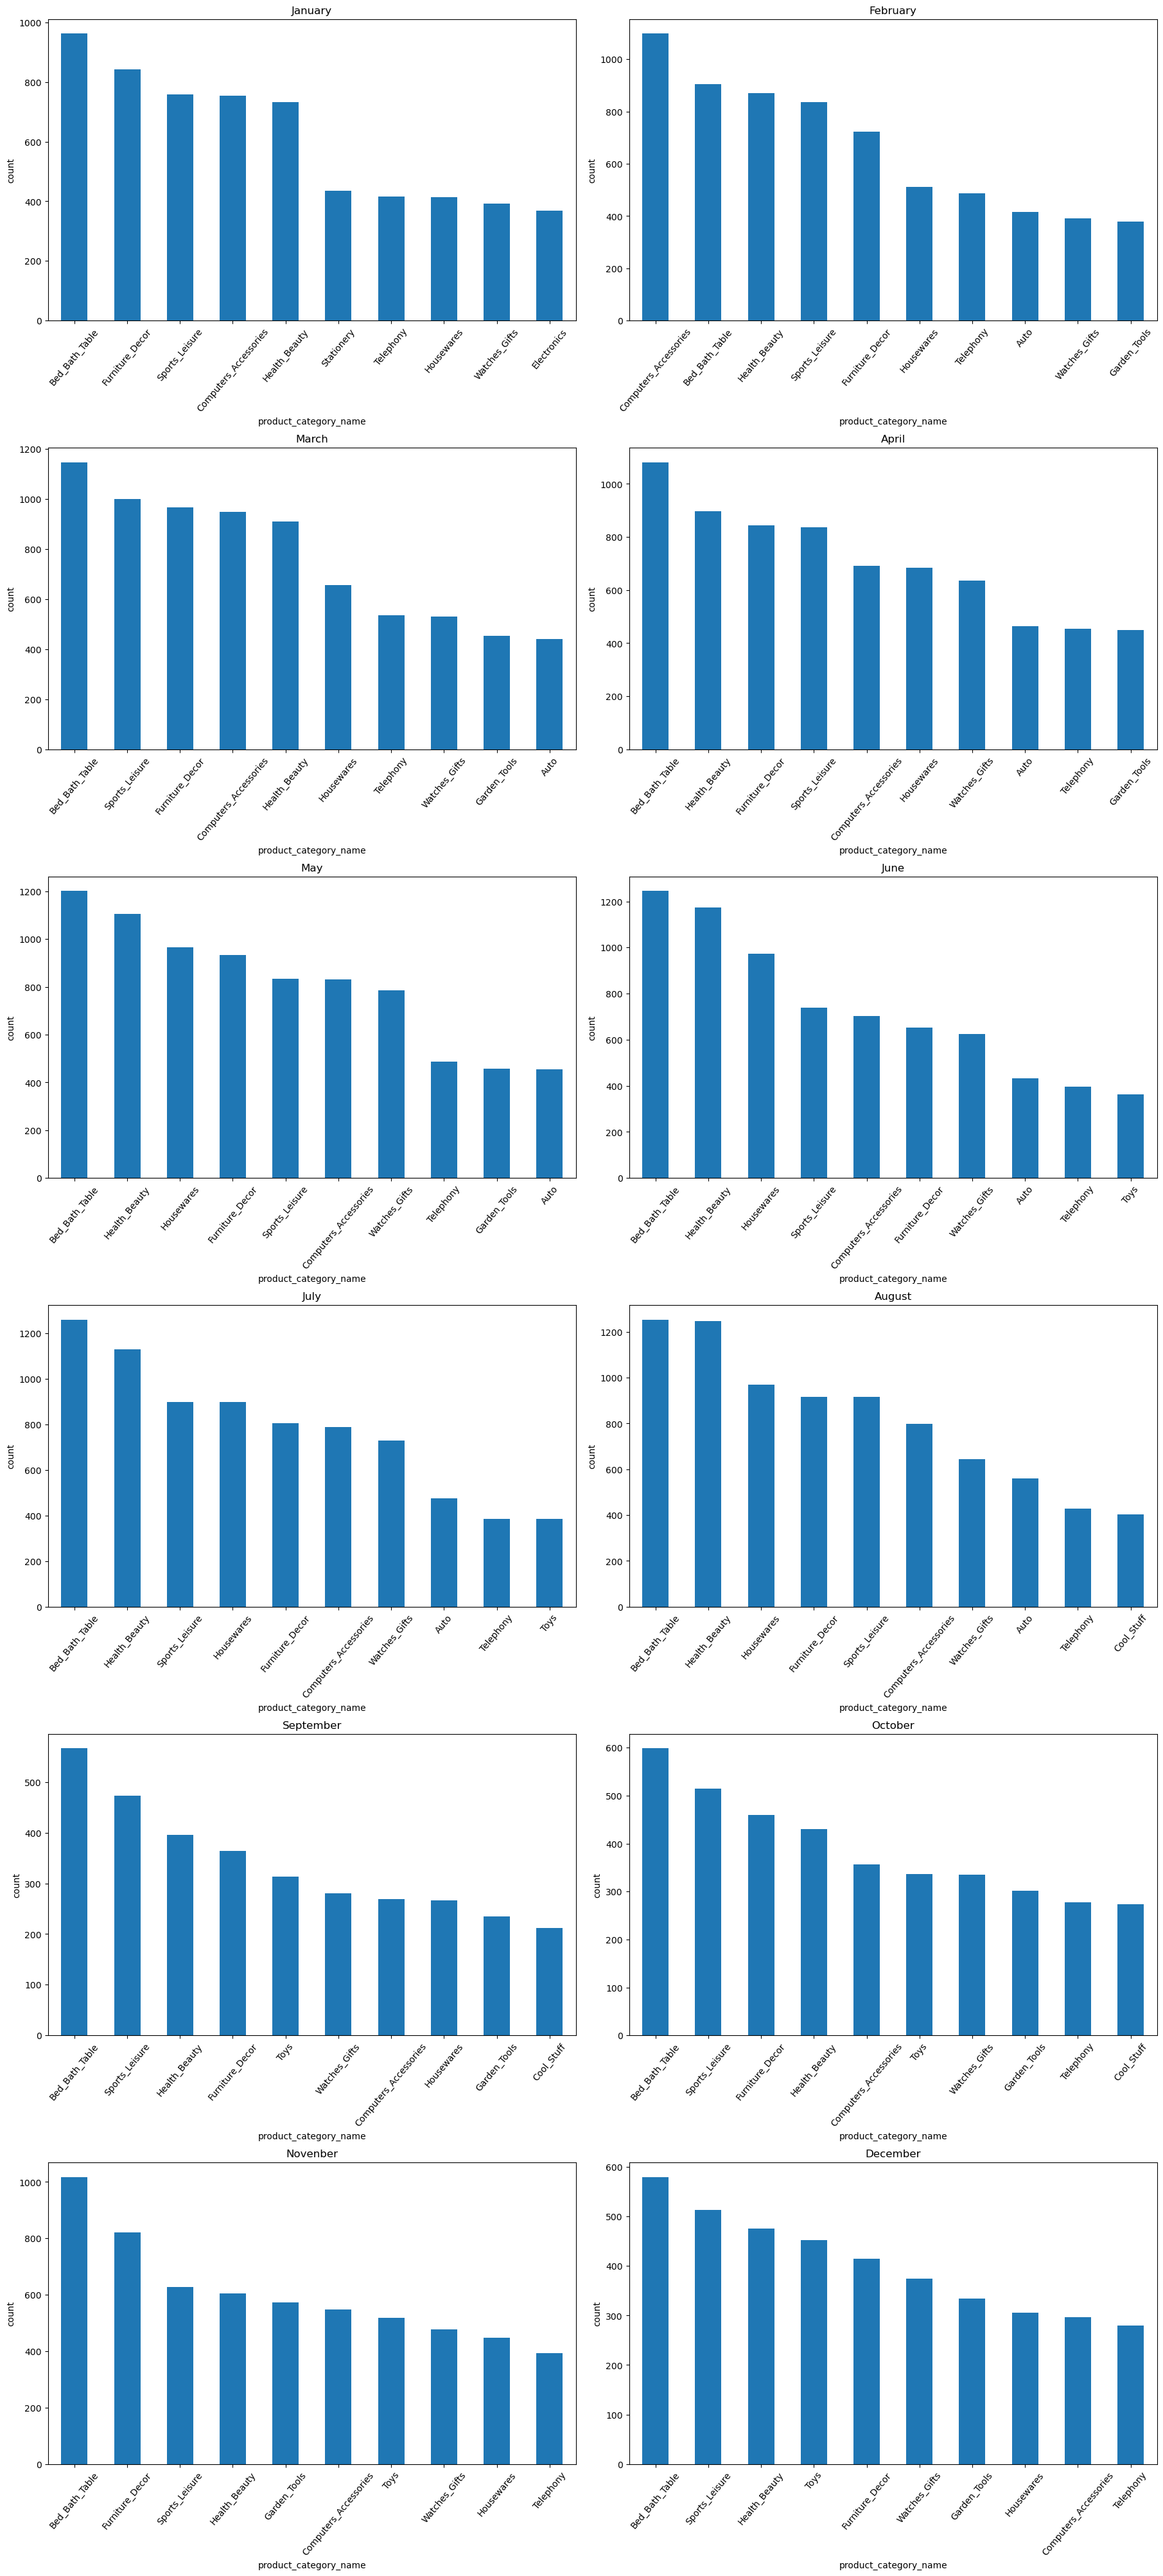

In [45]:
plt.figure(figsize = (18,40),layout ='constrained')

plt.subplot(6,2,1)
popular.loc[:,1].sort_values(ascending=False)[0:10].plot(kind='bar',title='January',ylabel='count',rot=50)
plt.subplot(6,2,2)
popular.loc[:,2].sort_values(ascending=False)[0:10].plot(kind='bar',title='February',ylabel='count',rot=50)
plt.subplot(6,2,3)
popular.loc[:,3].sort_values(ascending=False)[0:10].plot(kind='bar',title='March',ylabel='count',rot=50)
plt.subplot(6,2,4)
popular.loc[:,4].sort_values(ascending=False)[0:10].plot(kind='bar',title='April',ylabel='count',rot=50)
plt.subplot(6,2,5)
popular.loc[:,5].sort_values(ascending=False)[0:10].plot(kind='bar',title='May',ylabel='count',rot=50)
plt.subplot(6,2,6)
popular.loc[:,6].sort_values(ascending=False)[0:10].plot(kind='bar',title='June',ylabel='count',rot=50)
plt.subplot(6,2,7)
popular.loc[:,7].sort_values(ascending=False)[0:10].plot(kind='bar',title='July',ylabel='count',rot=50)
plt.subplot(6,2,8)
popular.loc[:,8].sort_values(ascending=False)[0:10].plot(kind='bar',title='August',ylabel='count',rot=50)
plt.subplot(6,2,9)
popular.loc[:,9].sort_values(ascending=False)[0:10].plot(kind='bar',title='September',ylabel='count',rot=50)
plt.subplot(6,2,10)
popular.loc[:,10].sort_values(ascending=False)[0:10].plot(kind='bar',title='October',ylabel='count',rot=50)
plt.subplot(6,2,11)
popular.loc[:,11].sort_values(ascending=False)[0:10].plot(kind='bar',title='Novenber',ylabel='count',rot=50)
plt.subplot(6,2,12)
popular.loc[:,12].sort_values(ascending=False)[0:10].plot(kind='bar',title='December',ylabel='count',rot=50)
plt.show()

In [46]:
#Merge5=order+customer+order_payment+order_item+products+seller
order_cust_pay_orditm_prd_seller=pd.merge(left=order_cust_pay_orditm_prd,right=sellers,left_on='seller_id',right_on='seller_id')

<Figure size 8000x4000 with 0 Axes>

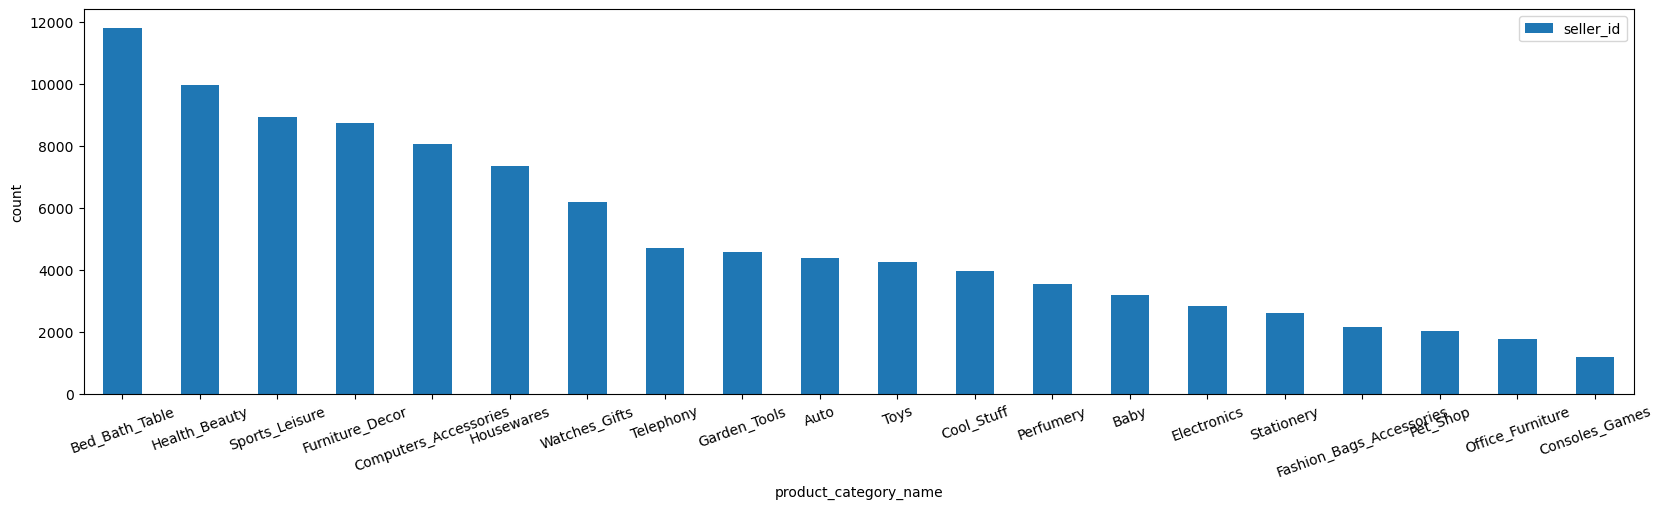

In [47]:
#Popular Products categories by seller
plt.figure(figsize = (80,40),layout ='constrained')
popular_s=order_cust_pay_orditm_prd_seller.pivot_table(index='product_category_name',values='seller_id',aggfunc="count")
popular_s.sort_values(by='seller_id',ascending=False)[0:20].plot(kind='bar',figsize = (20,5),ylabel='count')
plt.xticks(rotation=20)
plt.show()

In [48]:
popular_stt=order_cust_pay_orditm_prd_seller.pivot_table(index='product_category_name',columns='customer_state',
                                   values='customer_unique_id',aggfunc="count")


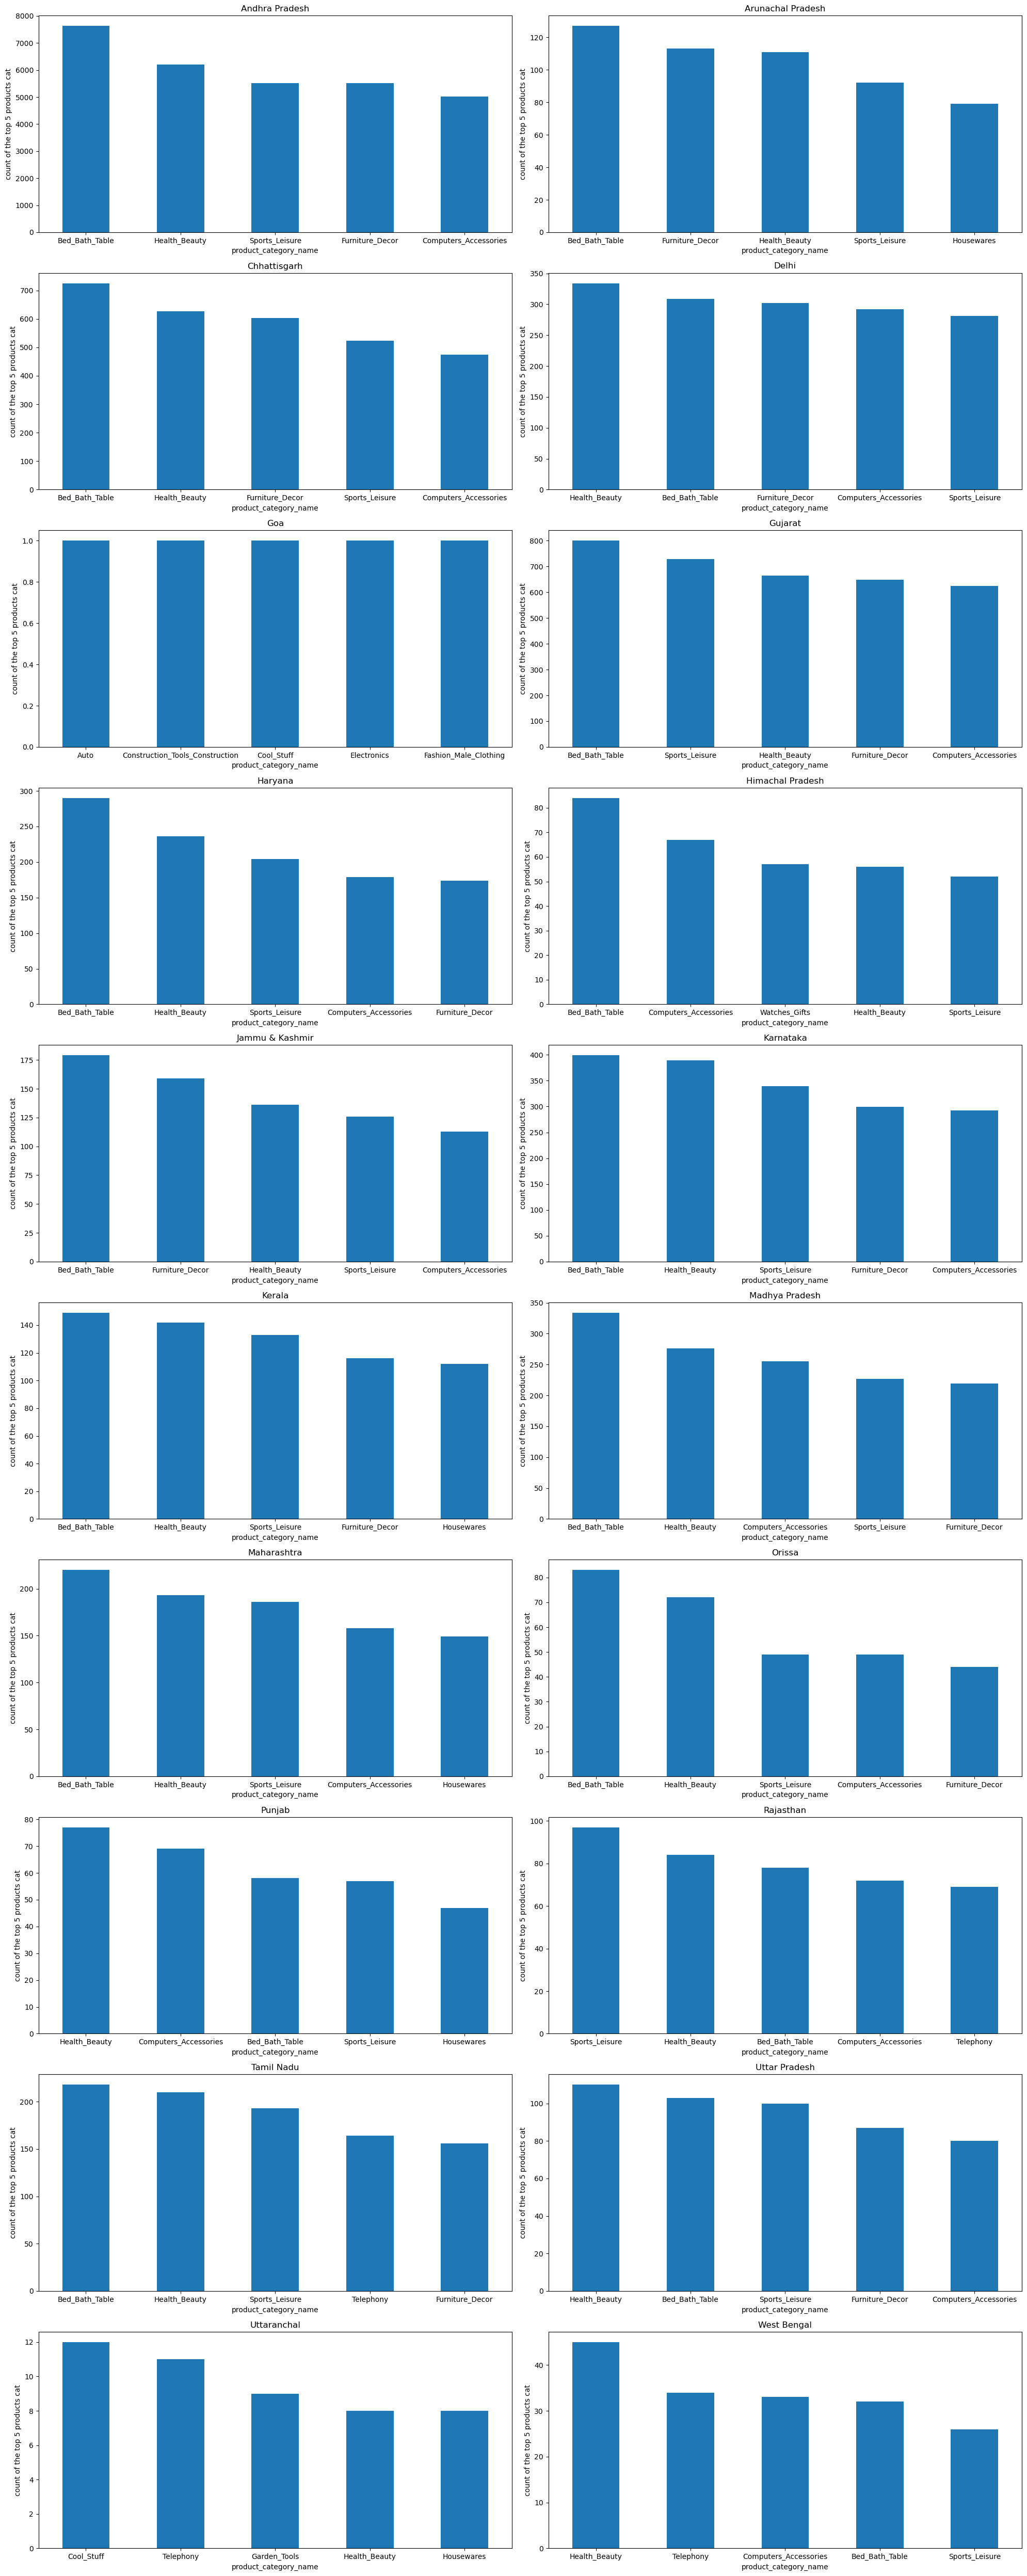

In [49]:
#Popular Products categories by state
plt.figure(figsize = (20,50),layout ='tight')

for i in np.arange(0,20):
    plt.subplot(10,2,(i+1))
    popular_stt.iloc[:,i].sort_values(ascending=False)[0:5].plot(kind='bar',subplots=True)
    plt.xticks(rotation=0)
    plt.ylabel('count of the top 5 products cat')

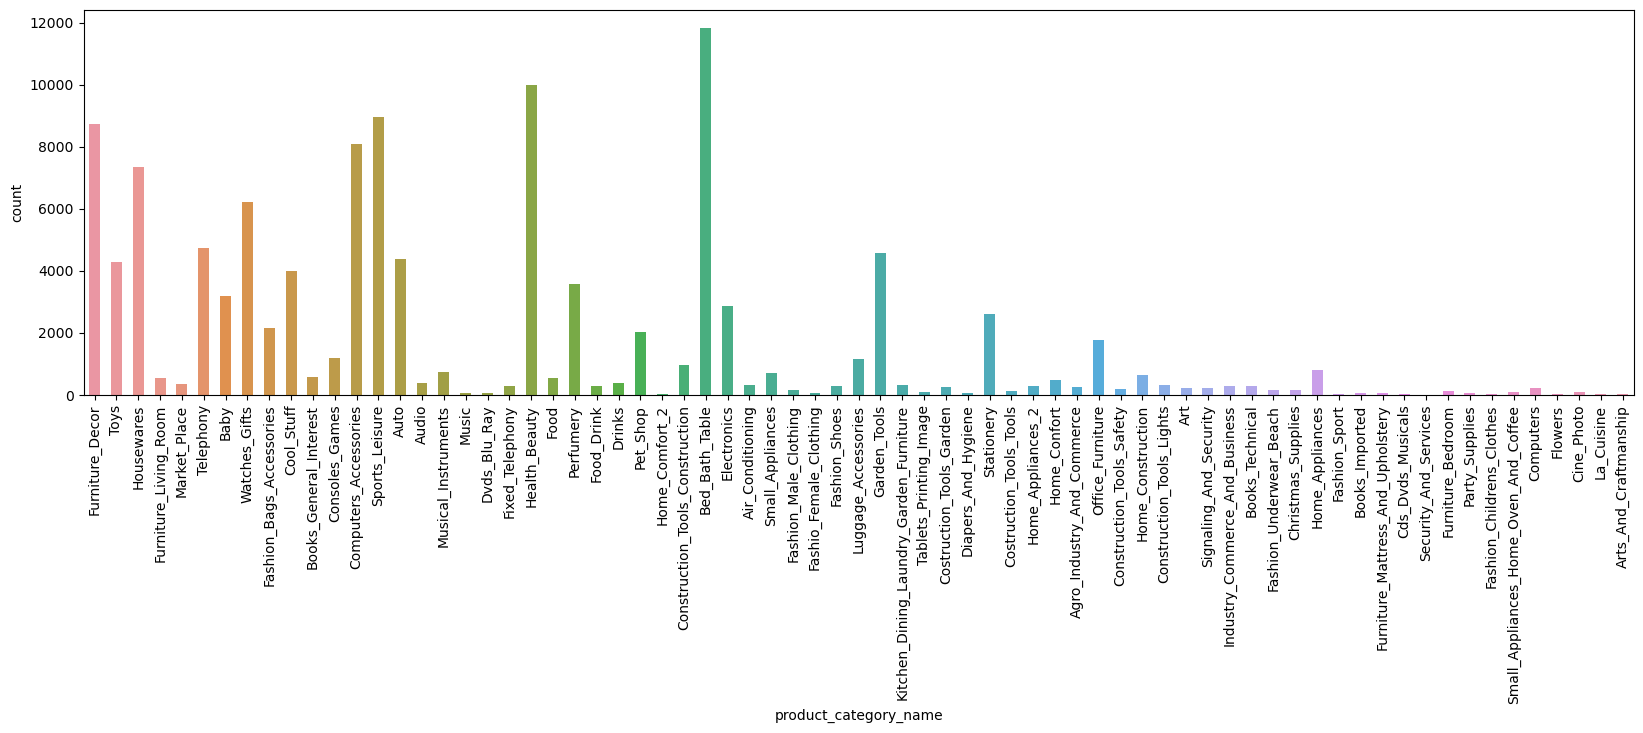

In [50]:
#Popular Products categories by category
plt.figure(figsize=(20,5))
sns.countplot(data=order_cust_pay_orditm_prd_seller,x='product_category_name', width=0.5)
plt.xticks(rotation=90)
plt.show()

## 1. Perform Detailed exploratory analysis
g. Popular product by state, month

In [51]:
popular_stp=order_cust_pay_orditm_prd_seller.pivot_table(index='product_id',columns='customer_state',
                                   values='customer_unique_id',aggfunc="count")

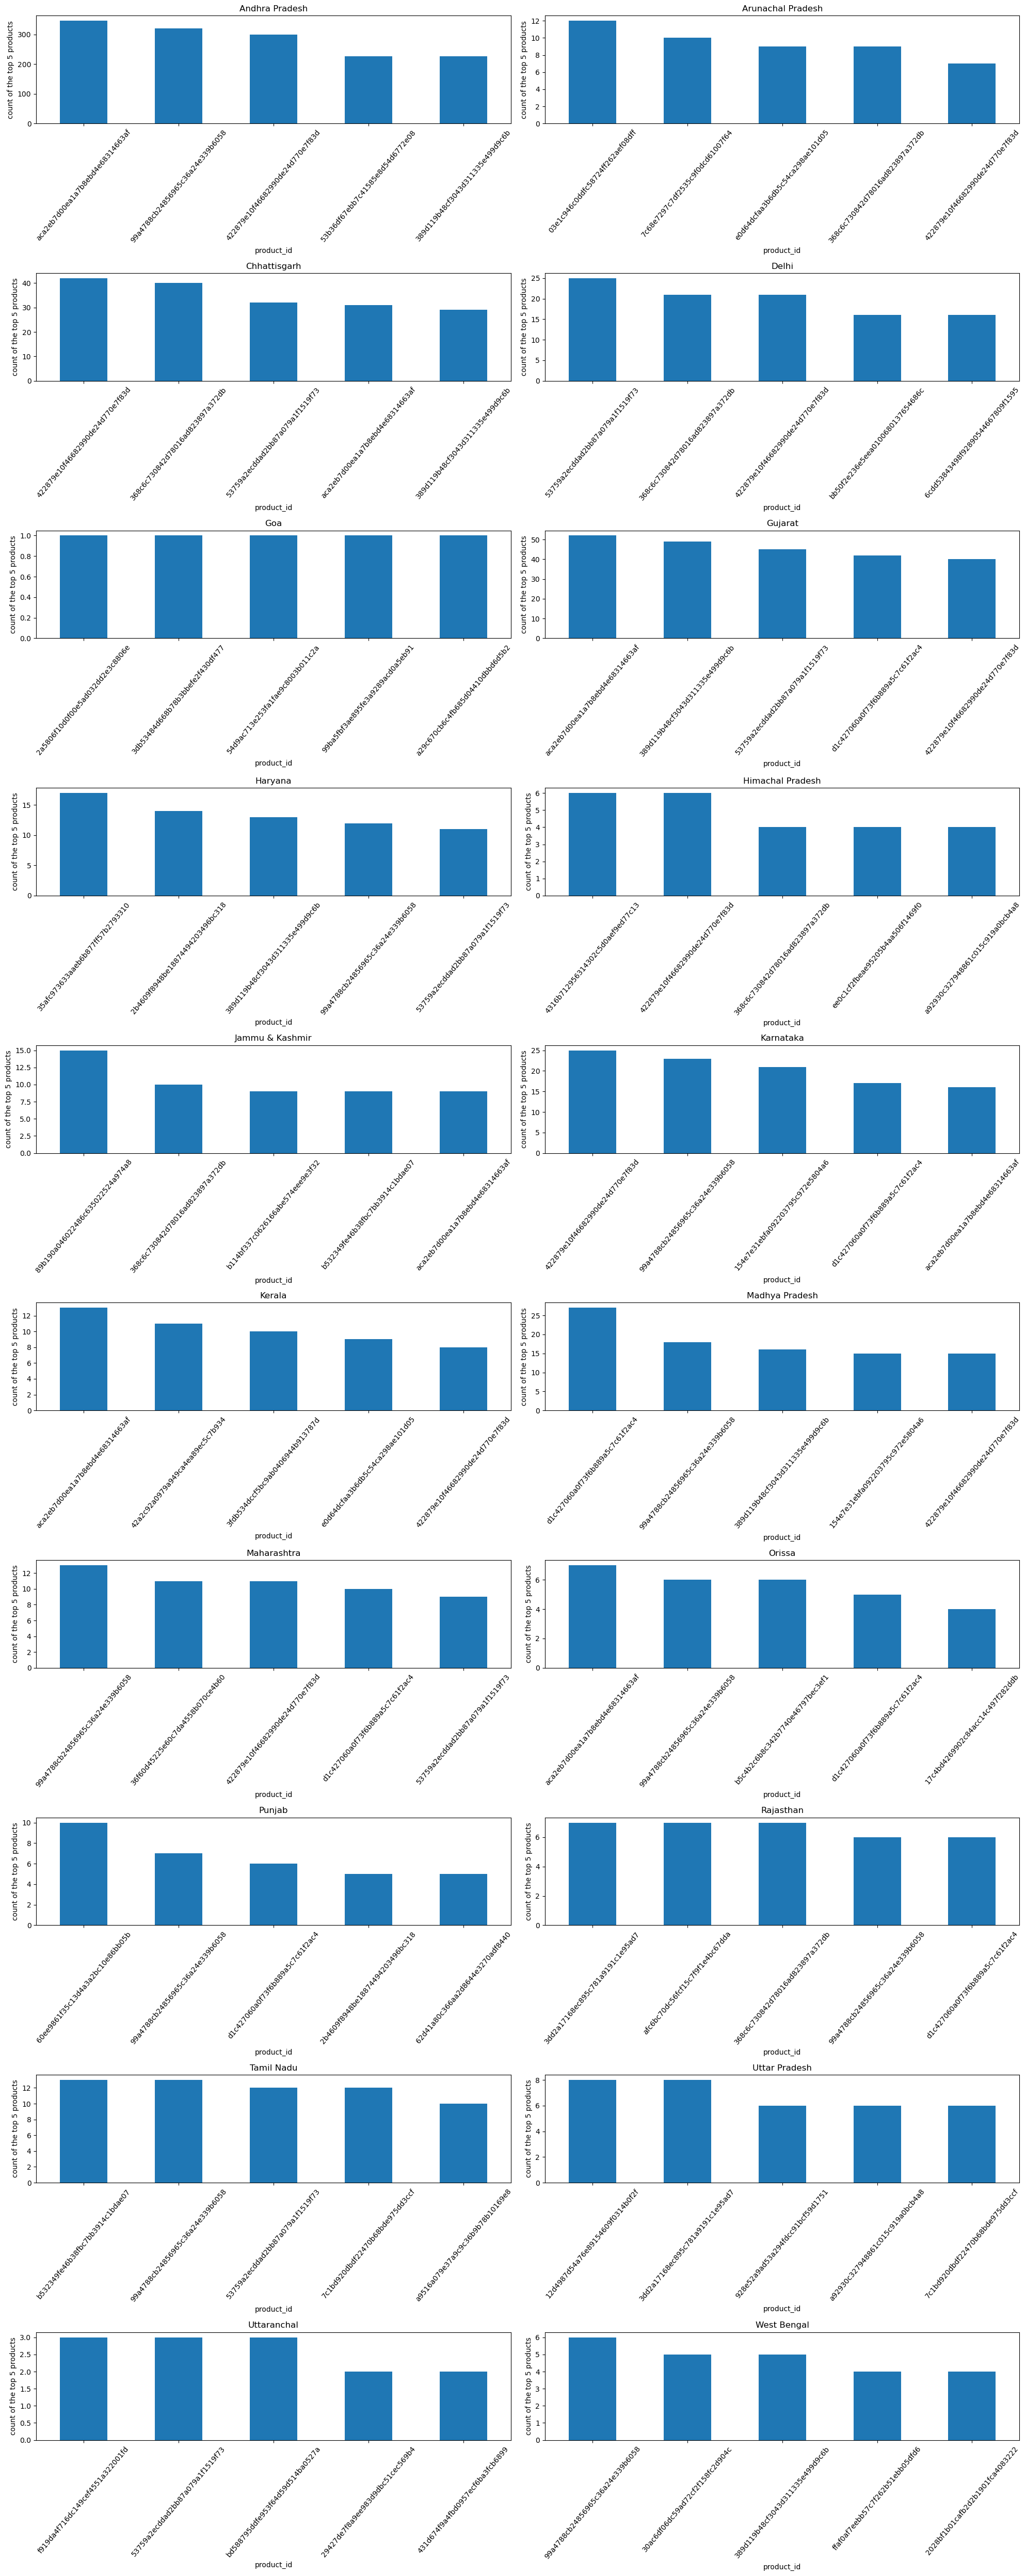

In [52]:
#Popular Products by state
plt.figure(figsize = (20,50),layout ='tight')

for i in np.arange(0,20):
    plt.subplot(10,2,(i+1))
    popular_stp.iloc[:,i].sort_values(ascending=False)[0:5].plot(kind='bar',subplots=True)
    plt.xticks(rotation=50)
    plt.ylabel('count of the top 5 products')

In [53]:
#Popular Products by month
popular_m=order_cust_pay_orditm_prd_seller.pivot_table(index='product_id',columns='month',
                                              values='customer_unique_id',aggfunc="count")

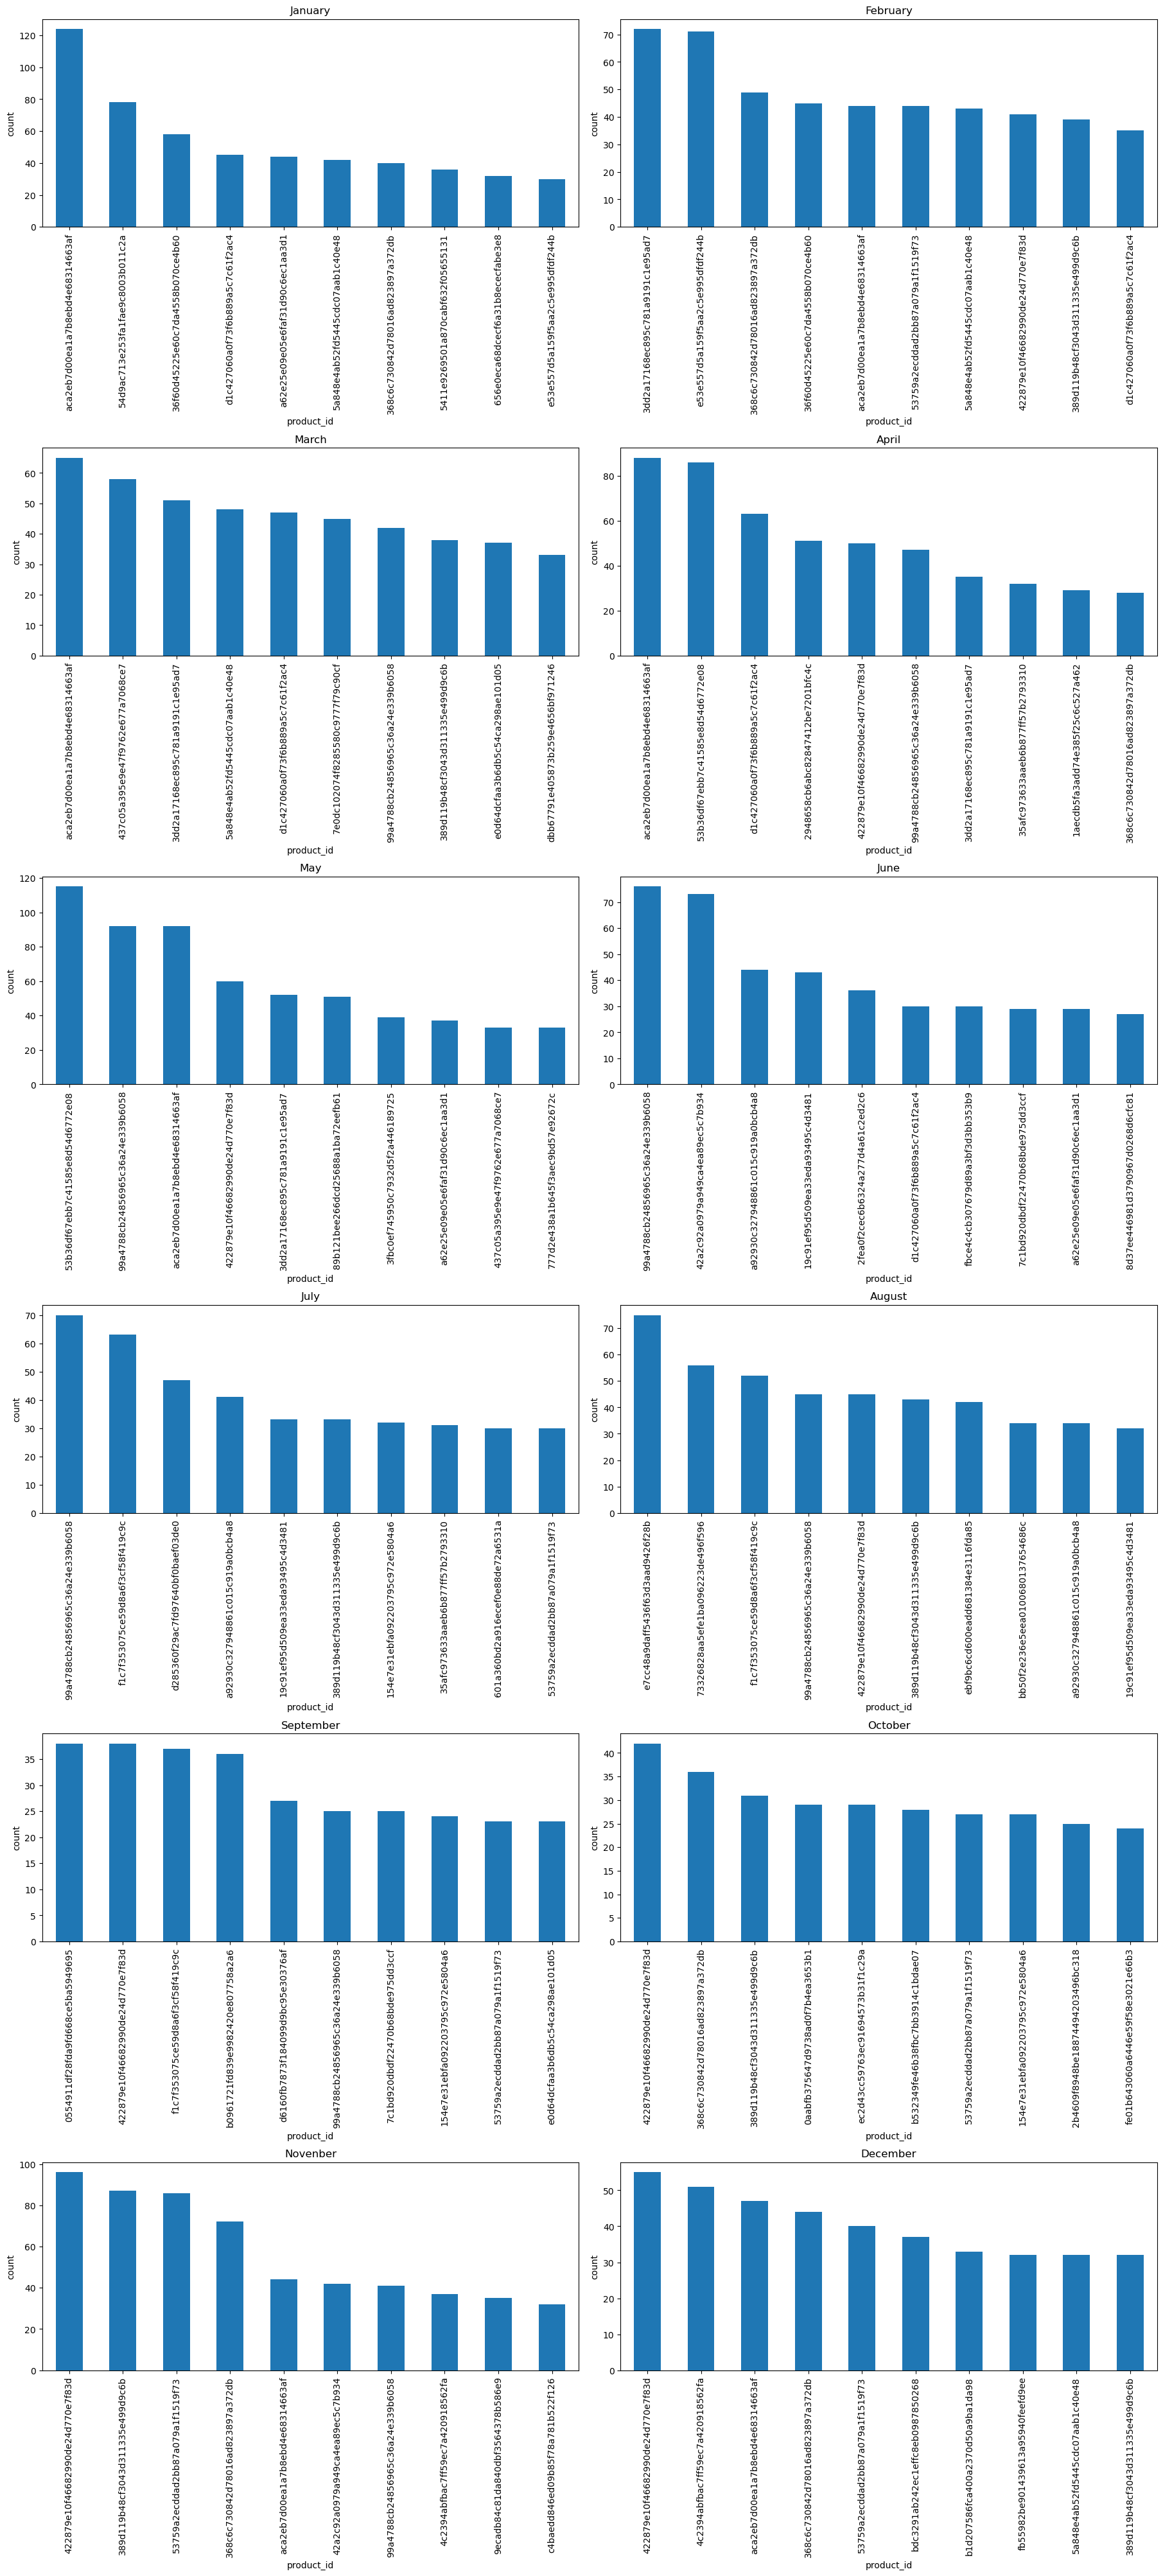

In [54]:
plt.figure(figsize = (18,40),layout ='constrained')

plt.subplot(6,2,1)
popular_m.loc[:,1].sort_values(ascending=False)[0:10].plot(kind='bar',title='January',ylabel='count',rot=90)
plt.subplot(6,2,2)
popular_m.loc[:,2].sort_values(ascending=False)[0:10].plot(kind='bar',title='February',ylabel='count',rot=90)
plt.subplot(6,2,3)
popular_m.loc[:,3].sort_values(ascending=False)[0:10].plot(kind='bar',title='March',ylabel='count',rot=90)
plt.subplot(6,2,4)
popular_m.loc[:,4].sort_values(ascending=False)[0:10].plot(kind='bar',title='April',ylabel='count',rot=90)
plt.subplot(6,2,5)
popular_m.loc[:,5].sort_values(ascending=False)[0:10].plot(kind='bar',title='May',ylabel='count',rot=90)
plt.subplot(6,2,6)
popular_m.loc[:,6].sort_values(ascending=False)[0:10].plot(kind='bar',title='June',ylabel='count',rot=90)
plt.subplot(6,2,7)
popular_m.loc[:,7].sort_values(ascending=False)[0:10].plot(kind='bar',title='July',ylabel='count',rot=90)
plt.subplot(6,2,8)
popular_m.loc[:,8].sort_values(ascending=False)[0:10].plot(kind='bar',title='August',ylabel='count',rot=90)
plt.subplot(6,2,9)
popular_m.loc[:,9].sort_values(ascending=False)[0:10].plot(kind='bar',title='September',ylabel='count',rot=90)
plt.subplot(6,2,10)
popular_m.loc[:,10].sort_values(ascending=False)[0:10].plot(kind='bar',title='October',ylabel='count',rot=90)
plt.subplot(6,2,11)
popular_m.loc[:,11].sort_values(ascending=False)[0:10].plot(kind='bar',title='Novenber',ylabel='count',rot=90)
plt.subplot(6,2,12)
popular_m.loc[:,12].sort_values(ascending=False)[0:10].plot(kind='bar',title='December',ylabel='count',rot=90)
plt.show()

## 1. Perform Detailed exploratory analysis
h. List top 10 most expensive products sorted by price

In [55]:
order_item['total_price']=order_item.price+order_item.freight_value

In [56]:
#identifying distinct products
no_of_products=order_item.drop_duplicates(subset='product_id')

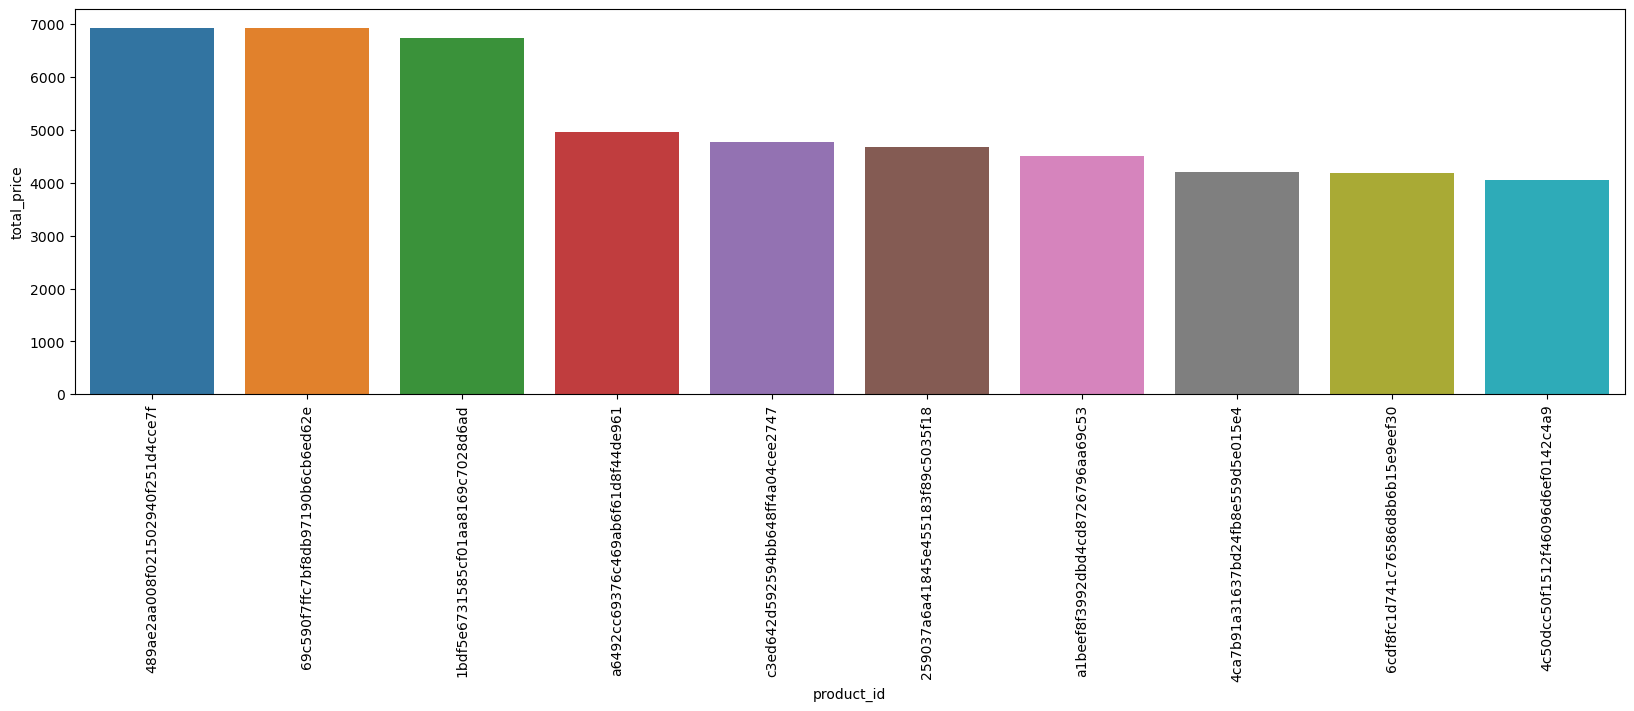

In [57]:
plt.figure(figsize=(20,5))
sns.barplot(data=no_of_products.sort_values(by='total_price',ascending=False)[:10],x='product_id',y='total_price')
plt.xticks(rotation=90)
plt.show()

## 2.Performing Customers/sellers Segmentation
a. Divide the customers into groups based on the revenue generated 

In [58]:
cust_total_spend=order_cust_pay_orditm_prd_seller.pivot_table(index='customer_unique_id',values='payment_value',
                                        aggfunc='sum').sort_values(by='payment_value',ascending=False)
cust_total_spend

#0a0a92112bd4c708ca5fde585afaa872	109312.64------This customer has spend the most than others(outlier)
#so not keeping this customer in any group

payment_value
customer_unique_id                             
0a0a92112bd4c708ca5fde585afaa872      109312.64
698e1cf81d01a3d389d96145f7fa6df8       45256.00
c402f431464c72e27330a67f7b94d4fb       44048.00
4007669dec559734d6f53e029e360987       36489.24
ef8d54b3797ea4db1d63f0ced6a906e9       30186.00
...                                         ...
2878e5b88167faab17d4fb83a986d38b          11.63
6f5b9d1cdccc4d28f0483a612edecacf          11.63
b33336f46234b24a613ad9064d13106d          10.89
bd06ce0e06ad77a7f681f1a4960a3cc6          10.07
317cfc692e3f86c45c95697c61c853a6           9.59

[95419 rows x 1 columns]

In [59]:
pd.cut(cust_total_spend[1:].payment_value,np.arange(1,60000,5000)).value_counts()

payment_value
(1, 5001]         95289
(5001, 10001]        98
(10001, 15001]       15
(15001, 20001]        8
(25001, 30001]        3
(20001, 25001]        1
(30001, 35001]        1
(35001, 40001]        1
(40001, 45001]        1
(45001, 50001]        1
(50001, 55001]        0
Name: count, dtype: int64

## 2. Performing Customers/sellers Segmentation
b. Divide the sellers into groups based on the revenue generated 

In [60]:
seller_total_revenue=order_cust_pay_orditm_prd_seller.pivot_table(index='seller_id',values='payment_value',
                                        aggfunc='sum').sort_values(by='payment_value',ascending=False)
seller_total_revenue
#7c67e1448b00f6e969d365cea6b010ab	507166.91------This seller has generated the most than others(outlier)

payment_value
seller_id                                      
7c67e1448b00f6e969d365cea6b010ab      507166.91
1025f0e2d44d7041d6cf58b6550e0bfa      308222.04
4a3ca9315b744ce9f8e9374361493884      301245.27
1f50f920176fa81dab994f9023523100      290253.42
53243585a1d6dc2643021fd1853d8905      284903.08
...                                         ...
ad14615bdd492b01b0d97922e87cb87f          19.21
702835e4b785b67a084280efca355756          18.56
4965a7002cca77301c82d3f91b82e1a9          16.36
77128dec4bec4878c37ab7d6169d6f26          15.22
cf6f6bc4df3999b9c6440f124fb2f687          12.22

[3095 rows x 1 columns]

In [61]:
pd.cut(seller_total_revenue.payment_value,np.arange(1,550000,10000)).value_counts()

payment_value
(1, 10001]          2644
(10001, 20001]       248
(20001, 30001]        74
(30001, 40001]        35
(40001, 50001]        23
(50001, 60001]        18
(60001, 70001]        15
(70001, 80001]         9
(80001, 90001]         6
(140001, 150001]       4
(300001, 310001]       2
(160001, 170001]       2
(130001, 140001]       2
(260001, 270001]       1
(500001, 510001]       1
(280001, 290001]       1
(290001, 300001]       1
(200001, 210001]       1
(230001, 240001]       1
(270001, 280001]       1
(180001, 190001]       1
(90001, 100001]        1
(170001, 180001]       1
(150001, 160001]       1
(120001, 130001]       1
(100001, 110001]       1
(190001, 200001]       0
(460001, 470001]       0
(420001, 430001]       0
(430001, 440001]       0
(440001, 450001]       0
(450001, 460001]       0
(490001, 500001]       0
(470001, 480001]       0
(480001, 490001]       0
(400001, 410001]       0
(510001, 520001]       0
(520001, 530001]       0
(410001, 420001]       0
(370001, 38

## 3. Cross-Selling (Which products are selling together)
Hint: We need to find which of the top 10 combinations of products are selling together in 
each transaction. (combination of 2 or 3 buying together)

In [75]:
order_cust_pay_orditm_prd_seller.head()

order_id                       customer_id  \
0  2e7a8482f6fb09756ca50c10d7bfc047  08c5351a6aca1c1589a38f244edeee9d   
1  35d3a51724a47ef1d0b89911e39cc4ff  27ab53f26192510ff85872aeb3759dcc   
2  c4f710df20f7d1500da1aef81a993f65  4b671f05b6eb9dc1d2c1bae9c8c78536   
3  81e5043198a44ddeb226002ff55d8ad4  ddd15ef77c83eea8c534d2896173a927   
4  81e5043198a44ddeb226002ff55d8ad4  ddd15ef77c83eea8c534d2896173a927   

  order_status order_purchase_timestamp order_approved_at  \
0      shipped      2016-09-04 21:15:00   10/7/2016 13:18   
1    delivered      2016-10-04 14:23:00    10/5/2016 2:44   
2    delivered      2016-10-10 15:50:00  10/10/2016 16:02   
3    delivered      2017-01-09 00:37:00     1/9/2017 0:45   
4    delivered      2017-01-09 00:37:00     1/9/2017 0:45   

  order_delivered_carrier_date order_delivered_customer_date  \
0             10/18/2016 13:14                           NaN   
1              10/14/2016 2:44              10/26/2016 15:03   
2             10/18/2016 15:53              10/26/2016 16:35   
3                1/9/2017 9:10                2/24/2017 9:42   
4                1/9/2017 9:10                2/24/2017 9:42   

  order_estimated_delivery_date  month  year  ...  product_name_lenght  \
0               10/20/2016 0:00      9  2016  ...                 59.0   
1               12/20/2016 0:00     10  2016  ...                 59.0   
2               12/14/2016 0:00     10  2016  ...                 59.0   
3                2/24/2017 0:00      1  2017  ...                 59.0   
4                2/24/2017 0:00      1  2017  ...                 59.0   

  product_description_lenght  product_photos_qty product_weight_g  \
0                      426.0                 2.0           1400.0   
1                      426.0                 2.0           1400.0   
2                      426.0                 2.0           1400.0   
3                      426.0                 2.0           1400.0   
4                      426.0                 2.0           1400.0   

  product_length_cm product_height_cm  product_width_cm  \
0              32.0               6.0              28.0   
1              32.0               6.0              28.0   
2              32.0               6.0              28.0   
3              32.0               6.0              28.0   
4              32.0               6.0              28.0   

  seller_zip_code_prefix  seller_city  seller_state  
0                  37580  Tirthahalli     Karnataka  
1                  37580  Tirthahalli     Karnataka  
2                  37580  Tirthahalli     Karnataka  
3                  37580  Tirthahalli     Karnataka  
4                  37580  Tirthahalli     Karnataka  

[5 rows x 37 columns]

In [76]:
order_cust_pay_orditm_prd_seller.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'month', 'year', 'week_num', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'Customer_Type', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_zip_code_prefix', 'seller_city', 'seller_state'],
      dtype='object')

In [80]:
cross=order_cust_pay_orditm_prd_seller.pivot_table(index=['customer_id','order_delivered_carrier_date','product_id'], values='order_id',aggfunc='count' )
cross.head()

order_id
customer_id                      order_delivered_carrier_date product_id                                
00012a2ce6f8dcda20d059ce98491703 11/17/2017 15:32             64315bd8c0c47303179dd2e25b579d00         1
000161a058600d5901f007fab4c27140 7/19/2017 19:09              84183944dc7cddca87a5d384452c1d3c         1
0001fd6190edaaf884bcaf3d49edf079 3/1/2017 15:24               9df2b21ec85378d71df4404712e17478         1
0002414f95344307404f0ace7a26f1d5 8/19/2017 11:34              af3ec22cce878225aae6d9eb6c7a78eb         1
000379cdec625522490c315e70c7a9fb 4/4/2018 18:11               868b3136c5b206f91b8208fbfdf2cb7c         1

In [82]:
cross.reset_index(inplace=True)

In [84]:
cross.columns=['customer_id', 'order_delivered_carrier_date', 'product_id',
       'number_of_orders']

In [86]:
cross.head()

customer_id order_delivered_carrier_date  \
0  00012a2ce6f8dcda20d059ce98491703             11/17/2017 15:32   
1  000161a058600d5901f007fab4c27140              7/19/2017 19:09   
2  0001fd6190edaaf884bcaf3d49edf079               3/1/2017 15:24   
3  0002414f95344307404f0ace7a26f1d5              8/19/2017 11:34   
4  000379cdec625522490c315e70c7a9fb               4/4/2018 18:11   

                         product_id  number_of_orders  
0  64315bd8c0c47303179dd2e25b579d00                 1  
1  84183944dc7cddca87a5d384452c1d3c                 1  
2  9df2b21ec85378d71df4404712e17478                 1  
3  af3ec22cce878225aae6d9eb6c7a78eb                 1  
4  868b3136c5b206f91b8208fbfdf2cb7c                 1

In [89]:
#Cross-Selling
cross[cross['number_of_orders']>2]

customer_id order_delivered_carrier_date  \
12      00066ccbe787a588c52bd5ff404590e3              2/14/2018 19:58   
16      000e943451fc2788ca6ac98a682f2f49               4/25/2017 8:23   
22      001051abfcfdbed9f87b4266213a5df1              5/30/2018 14:10   
79      00331de1659c7f4fb660c8810e6de3f5             12/28/2017 22:35   
102     00426311a53f3c052943c88b692a3be2             12/18/2017 19:09   
...                                  ...                          ...   
101298  ffbd58aa41cbab07f08190801e939f59              8/21/2018 16:19   
101303  ffbf82fe167e7156e06fc1778d6b1cea              8/11/2017 19:34   
101330  ffd294eea523f67ee8c743d3a904ee20              8/17/2017 22:06   
101376  fff3a5c6d542d52b05f7e4518adf996e              2/19/2018 22:04   
101392  fffecc9f79fd8c764f843e9951b11341              3/31/2018 14:29   

                              product_id  number_of_orders  
12      368c6c730842d78016ad823897a372db                 4  
16      99a4788cb24856965c36a24e339b6058                 4  
22      f72f94500a6463e91cc9ad3a4fa04234                 3  
79      54d2c5fad57672a4137d94c034827a13                 3  
102     44a34214a57dc373dcd80f54c919d006                 6  
...                                  ...               ...  
101298  643d903164c4b6ba8bd0b68348e9d135                 6  
101303  f03230fa1c067f43e1e56560adec9775                 3  
101330  95320d70592f898880af9c3d5394728c                 4  
101376  bd588795ddfe953f64d59d514ba0527a                 3  
101392  c045b19fdb30a3035c56d04c6fe2e622                 3  

[2392 rows x 4 columns]

## 4. Payment Behaviour
a. How customers are paying?

b. Which payment channels are used by most customers?


In [62]:
pd.DataFrame(order_cust_pay_orditm_prd_seller.payment_type.unique(),columns=['payment_type'])

payment_type
0  credit_card
1          UPI
2      voucher
3   debit_card

In [63]:
order_cust_pay_orditm_prd_seller.pivot_table(index='payment_type',
                                             values=['customer_id','payment_value']
                                                    ,aggfunc=({'customer_id':'count',
                                                              'payment_value':'sum'})).sort_values(by='customer_id',
                                                                                                   ascending=False)

customer_id  payment_value
payment_type                            
credit_card         86769    15589028.22
UPI                 22867     4059699.60
voucher              6274      405873.03
debit_card           1691      253533.86

## 5. Customer satisfaction towards category & product
a. Which categories (top 10) are maximum rated & minimum rated?

In [64]:
#Merge6=order+customer+order_payment+order_item+products+seller+review
order_cust_pay_orditm_prd_seller_review=pd.merge(left=order_cust_pay_orditm_prd_seller,right=order_review_ratings,left_on='order_id',
                    right_on='order_id',how='left')

In [65]:
review_rate=order_cust_pay_orditm_prd_seller_review.pivot_table(index='product_category_name',
                                                                columns='review_score',values='review_id',aggfunc='count')
review_rate

review_score                    1      2      3       4       5
product_category_name                                          
Agro_Industry_And_Commerce   27.0    7.0   14.0    57.0   147.0
Air_Conditioning             49.0    8.0   26.0    54.0   165.0
Art                          34.0    7.0   20.0    40.0   118.0
Arts_And_Craftmanship         3.0    NaN    3.0     3.0    15.0
Audio                        63.0   20.0   39.0    58.0   201.0
...                           ...    ...    ...     ...     ...
Stationery                  260.0   94.0  167.0   506.0  1598.0
Tablets_Printing_Image        7.0    6.0    8.0    21.0    45.0
Telephony                   617.0  190.0  477.0  1026.0  2416.0
Toys                        486.0  113.0  329.0   730.0  2623.0
Watches_Gifts               810.0  230.0  560.0  1159.0  3454.0

[71 rows x 5 columns]

In [66]:
review_rate.loc[:,2]

product_category_name
Agro_Industry_And_Commerce      7.0
Air_Conditioning                8.0
Art                             7.0
Arts_And_Craftmanship           NaN
Audio                          20.0
                              ...  
Stationery                     94.0
Tablets_Printing_Image          6.0
Telephony                     190.0
Toys                          113.0
Watches_Gifts                 230.0
Name: 2, Length: 71, dtype: float64

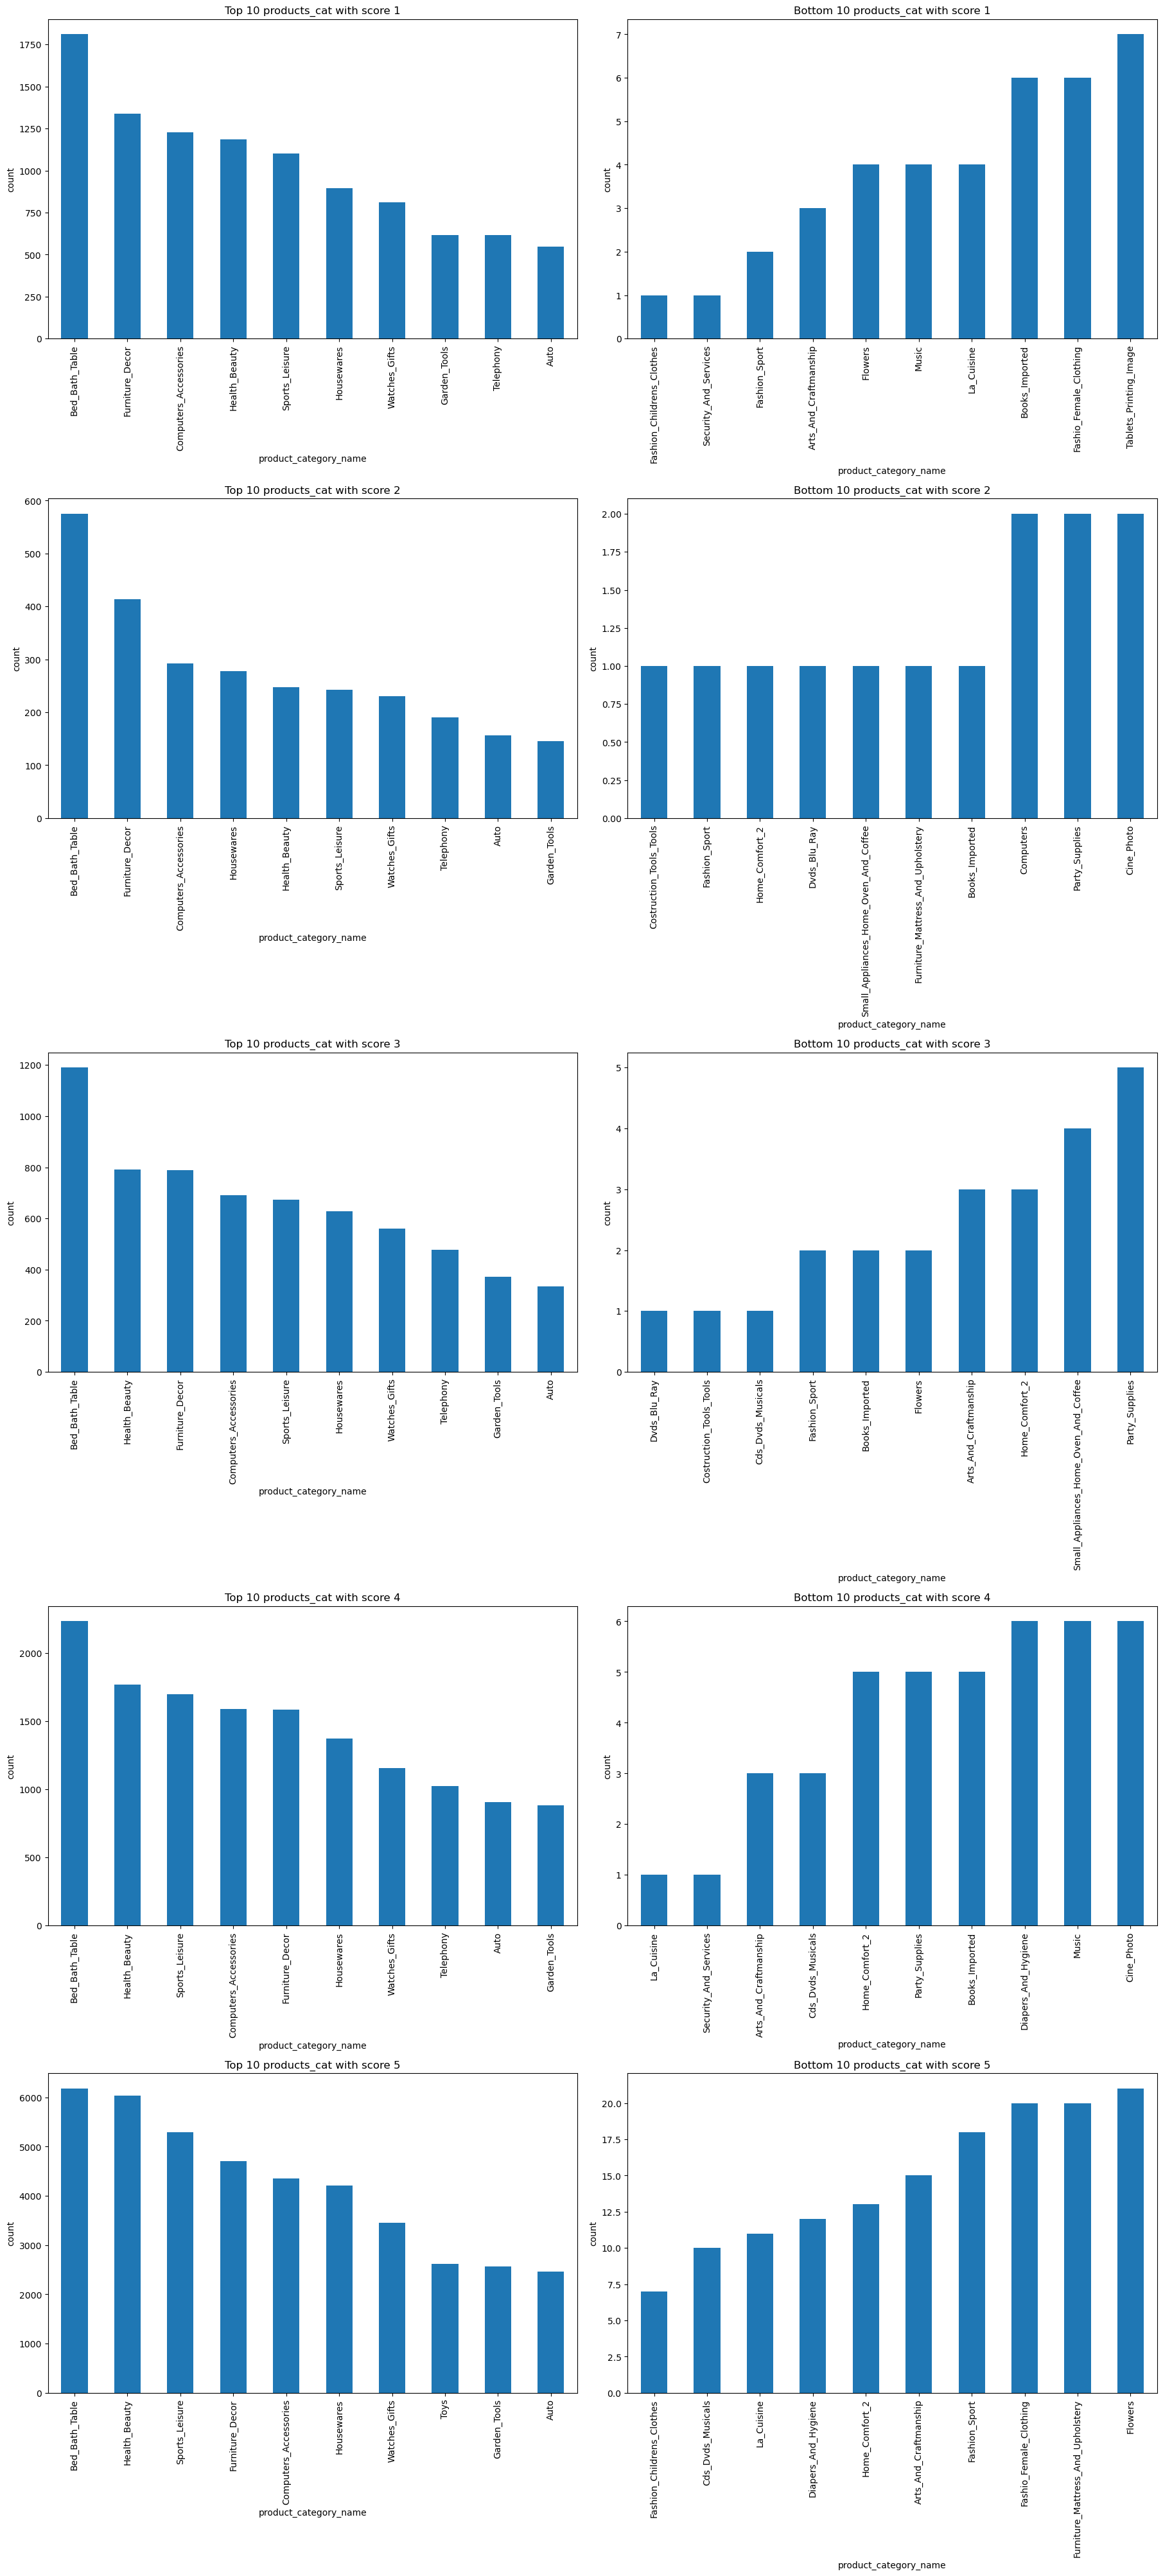

In [67]:
plt.figure(figsize = (18,40),layout ='constrained')

plt.subplot(5,2,1)
review_rate.loc[:,1].sort_values(ascending=False)[:10].plot(kind='bar',title='Top 10 products_cat with score 1',ylabel='count')

plt.subplot(5,2,2)
review_rate.loc[:,1].sort_values(ascending=True)[:10].plot(kind='bar',title='Bottom 10 products_cat with score 1',ylabel='count')

plt.subplot(5,2,3)
review_rate.loc[:,2].sort_values(ascending=False)[:10].plot(kind='bar',title='Top 10 products_cat with score 2',ylabel='count')

plt.subplot(5,2,4)
review_rate.loc[:,2].sort_values(ascending=True)[:10].plot(kind='bar',title='Bottom 10 products_cat with score 2',ylabel='count')

plt.subplot(5,2,5)
review_rate.loc[:,3].sort_values(ascending=False)[:10].plot(kind='bar',title='Top 10 products_cat with score 3',ylabel='count')

plt.subplot(5,2,6)
review_rate.loc[:,3].sort_values(ascending=True)[:10].plot(kind='bar',title='Bottom 10 products_cat with score 3',ylabel='count')


plt.subplot(5,2,7)
review_rate.loc[:,4].sort_values(ascending=False)[:10].plot(kind='bar',title='Top 10 products_cat with score 4',ylabel='count')

plt.subplot(5,2,8)
review_rate.loc[:,4].sort_values(ascending=True)[:10].plot(kind='bar',title='Bottom 10 products_cat with score 4',ylabel='count')


plt.subplot(5,2,9)
review_rate.loc[:,5].sort_values(ascending=False)[:10].plot(kind='bar',title='Top 10 products_cat with score 5',ylabel='count')

plt.subplot(5,2,10)
review_rate.loc[:,5].sort_values(ascending=True)[:10].plot(kind='bar',title='Bottom 10 products_cat with score 5',ylabel='count')

plt.show()

## 5. Customer satisfaction towards category & product
b. Which products (top10) are maximum rated & minimum rated?

In [68]:
review_rate2=order_cust_pay_orditm_prd_seller_review.pivot_table(index='product_id',
                                                                columns='review_score',values='review_id',aggfunc='count')

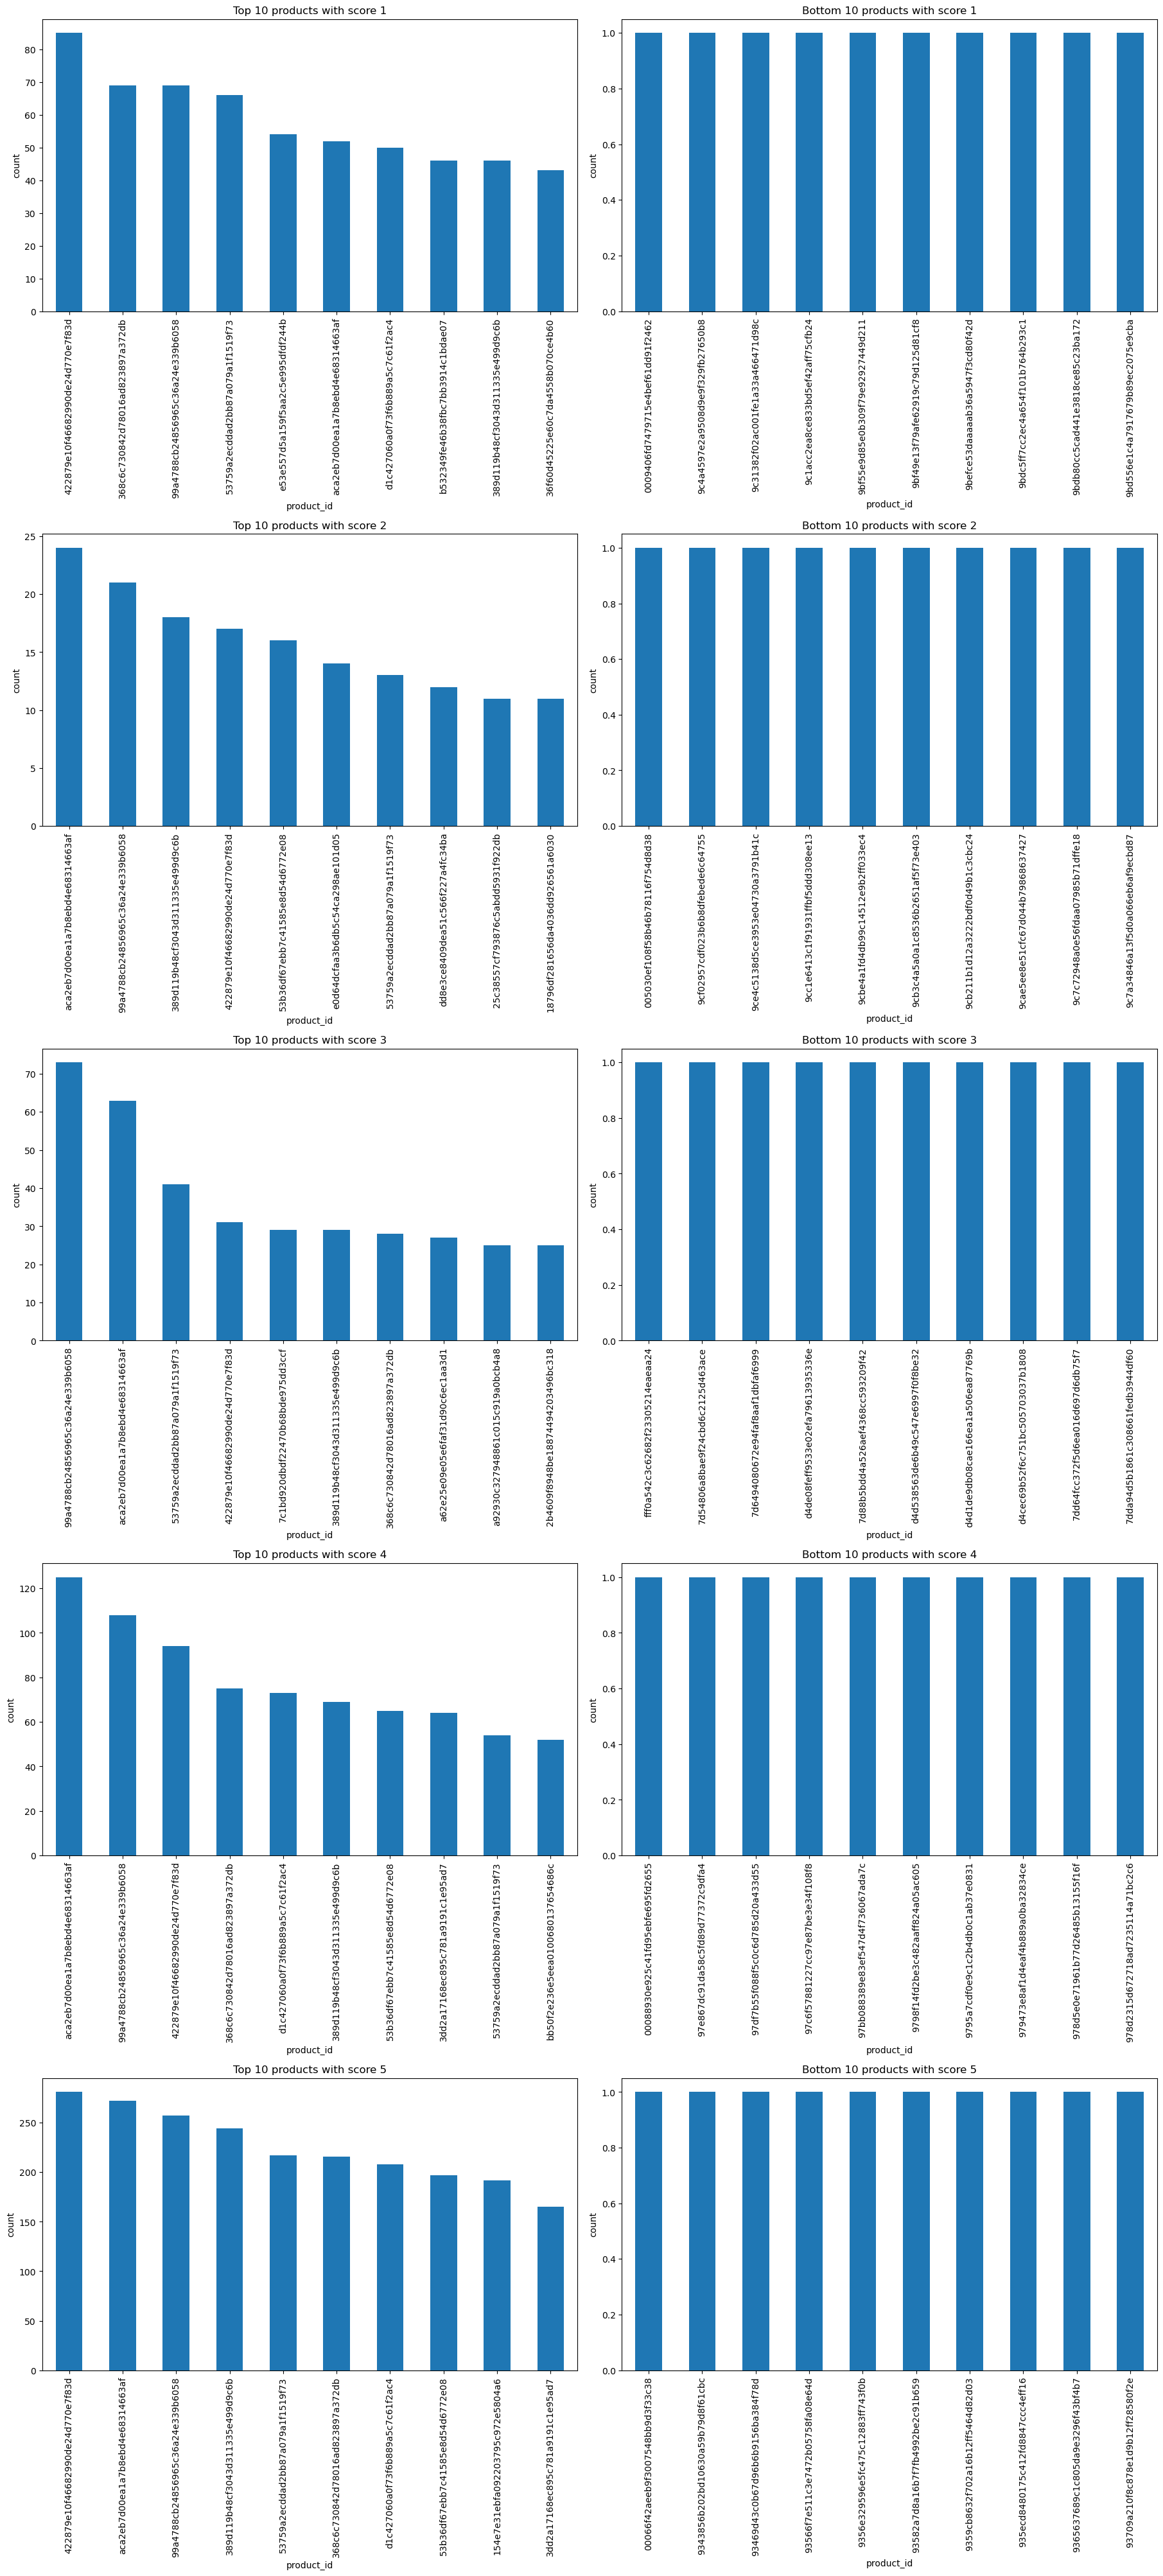

In [69]:
plt.figure(figsize = (18,40),layout ='constrained')

plt.subplot(5,2,1)
review_rate2.loc[:,1].sort_values(ascending=False)[:10].plot(kind='bar',title='Top 10 products with score 1',ylabel='count')

plt.subplot(5,2,2)
review_rate2.loc[:,1].sort_values(ascending=True)[:10].plot(kind='bar',title='Bottom 10 products with score 1',ylabel='count')

plt.subplot(5,2,3)
review_rate2.loc[:,2].sort_values(ascending=False)[:10].plot(kind='bar',title='Top 10 products with score 2',ylabel='count')

plt.subplot(5,2,4)
review_rate2.loc[:,2].sort_values(ascending=True)[:10].plot(kind='bar',title='Bottom 10 products with score 2',ylabel='count')

plt.subplot(5,2,5)
review_rate2.loc[:,3].sort_values(ascending=False)[:10].plot(kind='bar',title='Top 10 products with score 3',ylabel='count')

plt.subplot(5,2,6)
review_rate2.loc[:,3].sort_values(ascending=True)[:10].plot(kind='bar',title='Bottom 10 products with score 3',ylabel='count')


plt.subplot(5,2,7)
review_rate2.loc[:,4].sort_values(ascending=False)[:10].plot(kind='bar',title='Top 10 products with score 4',ylabel='count')

plt.subplot(5,2,8)
review_rate2.loc[:,4].sort_values(ascending=True)[:10].plot(kind='bar',title='Bottom 10 products with score 4',ylabel='count')


plt.subplot(5,2,9)
review_rate2.loc[:,5].sort_values(ascending=False)[:10].plot(kind='bar',title='Top 10 products with score 5',ylabel='count')

plt.subplot(5,2,10)
review_rate2.loc[:,5].sort_values(ascending=True)[:10].plot(kind='bar',title='Bottom 10 products with score 5',ylabel='count')

plt.show()

## 5. Customer satisfaction towards category & product
c. Average rating by location, seller, product, category, month 

In [70]:
#Average rating by seller
order_cust_pay_orditm_prd_seller_review.pivot_table(index='seller_id',values='review_score',aggfunc='mean')

review_score
seller_id                                     
0015a82c2db000af6aaaf3ae2ecb0532      3.666667
001cca7ae9ae17fb1caed9dfb1094831      3.883817
001e6ad469a905060d959994f1b41e4f      1.000000
002100f778ceb8431b7a1020ff7ab48f      4.033898
003554e2dce176b5555353e4f3555ac8      5.000000
...                                        ...
ffcfefa19b08742c5d315f2791395ee5      1.000000
ffdd9f82b9a447f6f8d4b91554cc7dd3      4.285714
ffeee66ac5d5a62fe688b9d26f83f534      4.214286
fffd5413c0700ac820c7069d66d98c89      3.838710
ffff564a4f9085cd26170f4732393726      2.100000

[3095 rows x 1 columns]

In [71]:
#Average rating by product
order_cust_pay_orditm_prd_seller_review.pivot_table(index='product_id',values='review_score',aggfunc='mean')

review_score
product_id                                    
00066f42aeeb9f3007548bb9d3f33c38           5.0
00088930e925c41fd95ebfe695fd2655           4.0
0009406fd7479715e4bef61dd91f2462           1.0
000b8f95fcb9e0096488278317764d19           5.0
000d9be29b5207b54e86aa1b1ac54872           5.0
...                                        ...
fff6177642830a9a94a0f2cba5e476d1           4.5
fff81cc3158d2725c0655ab9ba0f712c           4.0
fff9553ac224cec9d15d49f5a263411f           5.0
fffdb2d0ec8d6a61f0a0a0db3f25b441           5.0
fffe9eeff12fcbd74a2f2b007dde0c58           4.0

[32951 rows x 1 columns]

In [72]:
#Average rating by category
order_cust_pay_orditm_prd_seller_review.pivot_table(index='product_category_name',values='review_score',aggfunc='mean')

review_score
product_category_name                   
Agro_Industry_And_Commerce      4.150794
Air_Conditioning                3.920530
Art                             3.917808
Arts_And_Craftmanship           4.125000
Audio                           3.824147
...                                  ...
Stationery                      4.176381
Tablets_Printing_Image          4.045977
Telephony                       3.938214
Toys                            4.142490
Watches_Gifts                   4.000644

[71 rows x 1 columns]

In [73]:
#Average rating by month
order_cust_pay_orditm_prd_seller_review.pivot_table(index='month',values='review_score',aggfunc='mean')

review_score
month              
1          3.943279
2          3.788968
3          3.781311
4          4.036545
5          4.118807
6          4.156802
7          4.169240
8          4.204288
9          4.123128
10         4.011661
11         3.825638
12         3.927987